In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 8})

# I. LOAD DATA

In [2]:
train0 = pd.read_csv('./Data/train.csv') 

In [3]:
train0.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print('The number of rows: ', train0.shape[0])

The number of rows:  1460


In [5]:
print('The datatypes in the dataframe:')
train0.dtypes.unique()

The datatypes in the dataframe:


array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [6]:
#list(train0)

## Create some new variables

In [7]:
# Create New Numerical Variables
train0['AgeWhenSold'] = train0['YrSold'] - train0['YearBuilt']
train0['YrsSinceRemodel'] = train0['YrSold'] - train0['YearRemodAdd'] 

In [8]:
# Ensure these variabes are categorical
train0['MSSubClass'] = train0['MSSubClass'].astype(str)
train0['OverallQual'] = train0['OverallQual'].astype(str)
train0['OverallCond'] = train0['OverallCond'].astype(str)

train0['MoSold'] = train0['MoSold'].astype(str)
train0['YrSold'] = train0['YrSold'].astype(str)
train0['YearBuilt'] = train0['YearBuilt'].astype(str)
      
train0['YearRemodAdd'] = train0['YearRemodAdd'].astype(str)
train0['GarageYrBlt'] = train0['GarageYrBlt'].astype(str)

In [9]:
# Replacing this string np.nan (will look at missing values later)
train0.loc[(train0['GarageYrBlt']=='nan'),'GarageYrBlt']= np.nan

# II. EXPLORATORY DATA ANALYSIS & VISUALIZATIONS

### Look at the Output/Dependent Variable (Y) - SalePrice 🎯

In [10]:
zthres = 4
# Which indices have z-scores >  zthres
zvals = stats.zscore(train0['SalePrice'])
indx = np.where(abs(zvals) > 4.0)

print('The indices with z-scores > ', zthres,':')
print(indx)
print('\nThose z-scores: ')
print(zvals[indx])
print('\nNumber of indices:',len(indx[0]))

The indices with z-scores >  4 :
(array([ 178,  440,  691,  769,  803,  898, 1046, 1169, 1182]),)

Those z-scores: 
[4.04098249 4.71041276 7.22881942 4.49634819 5.06214602 5.42383959
 4.73032076 5.59185509 7.10289909]

Number of indices: 9


25th percentile: 129975.0
50th percentile: 163000.0
75th percentile: 214000.0
# of Missing Rows:  0  out of  1460


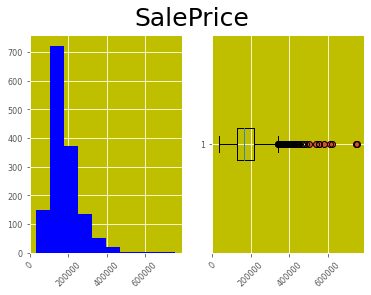

In [11]:
# The Distribution of the OUTPUT/DEPENDENT variable

fig, axs = plt.subplots(1,2)
fig.suptitle('SalePrice',fontsize=25)
axs[1].boxplot(train0['SalePrice'],vert=False)
axs[1].tick_params(axis='x', rotation = 45)
axs[1].set_facecolor('y')

axs[1].scatter(train0.loc[indx,'SalePrice'], 
              [np.ones(len(indx[0]))]) # large z-scores 

axs[0].hist(train0['SalePrice'],color='b')
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_facecolor('y')

print('25th percentile:',train0['SalePrice'].quantile(.25))
print('50th percentile:',train0['SalePrice'].median())
print('75th percentile:',train0['SalePrice'].quantile(.75))
print('# of Missing Rows: ', train0['SalePrice'].isna().sum(), 
    ' out of ',len(train0['SalePrice']))

#### REMOVE these indices that have z-scores > 4

In [12]:
# train0 = train0.drop(labels=list(indx[0]), axis=0).reset_index()

In [13]:
train0.shape[0]

1460

## A. The Numeric Variables

In [14]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_train = train0.select_dtypes(include=numerics)
numlist = list(num_train)
print(len(numlist),' numeric variables')
print(numlist)

32  numeric variables
['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'AgeWhenSold', 'YrsSinceRemodel']


In [15]:
# num_train.describe()

### The Independent Variable (Xs) 

In [16]:
# correlation threshold, used to highlight particular figures 
corr_thrshld = 0.4

<ipython-input-17-08d22c89da3e>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1,2)


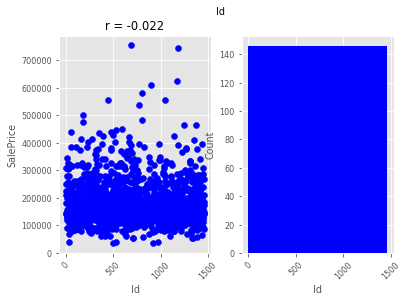

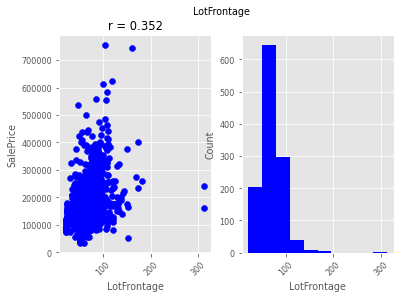

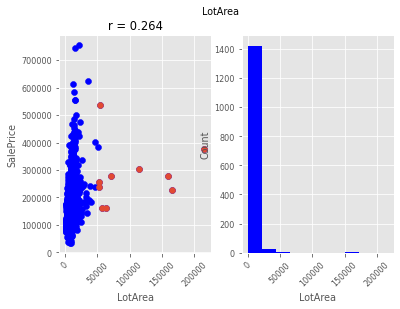

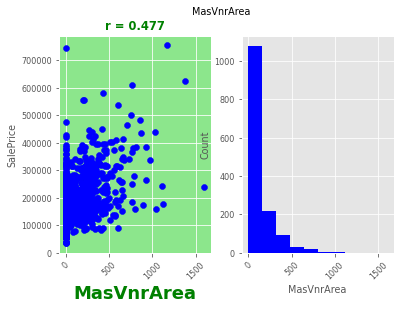

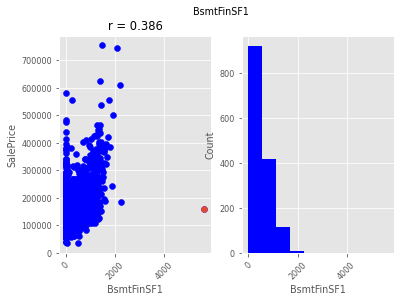

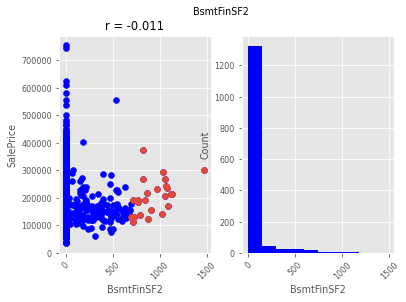

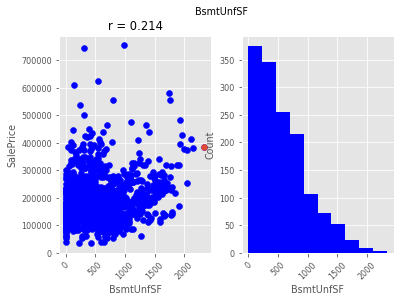

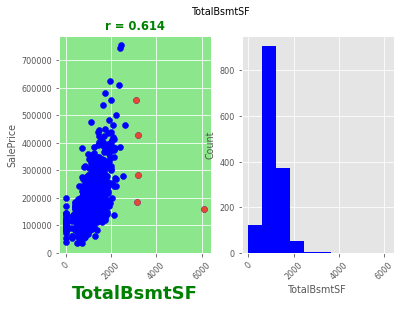

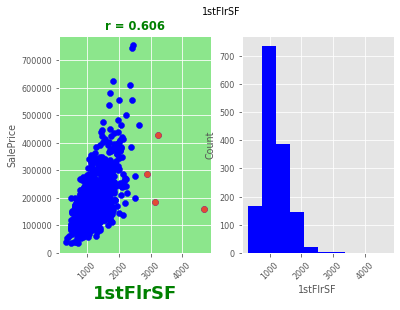

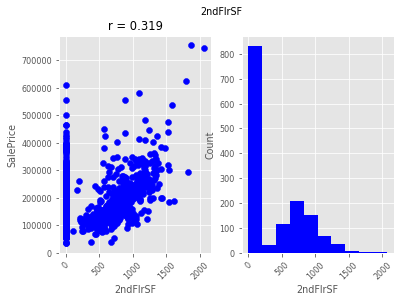

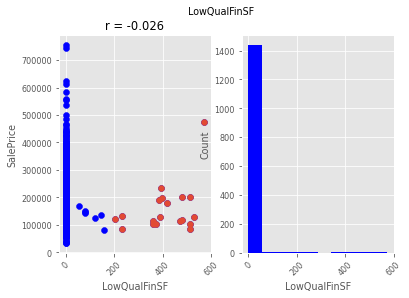

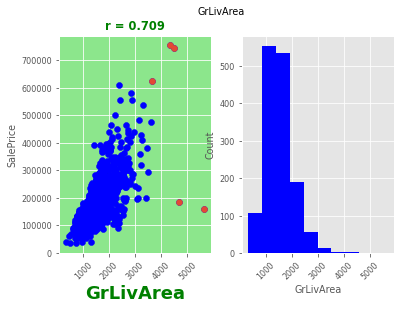

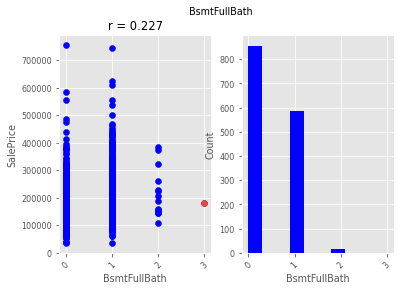

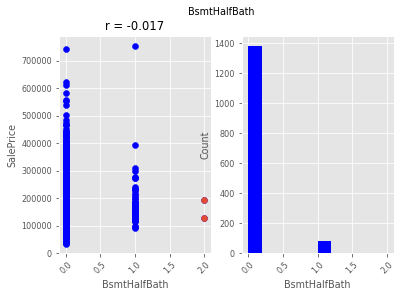

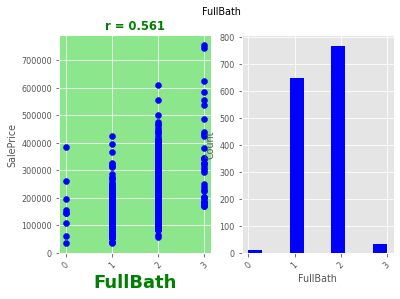

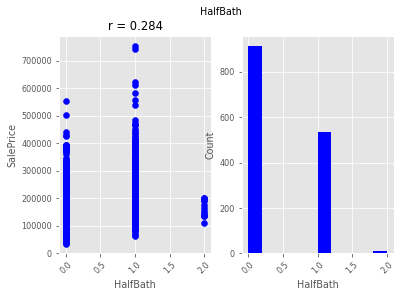

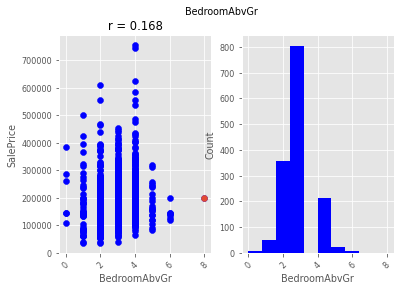

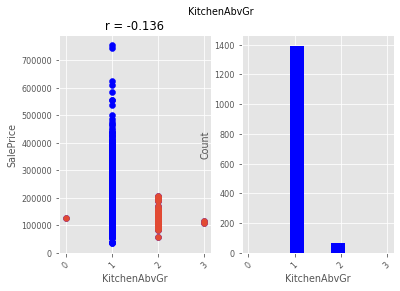

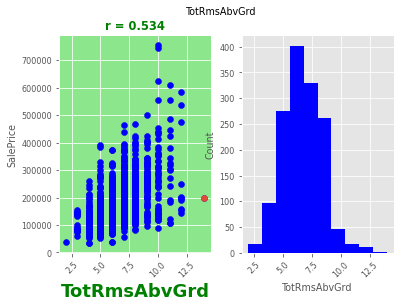

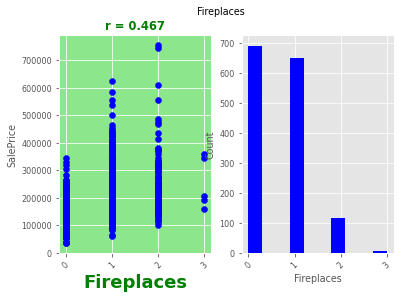

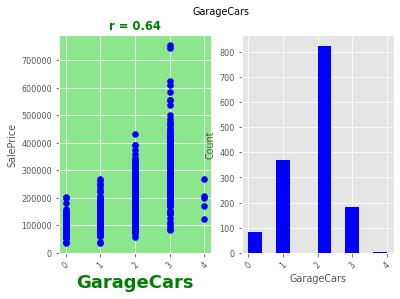

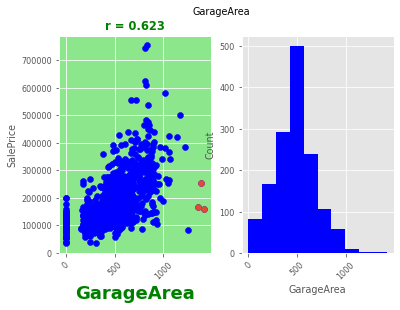

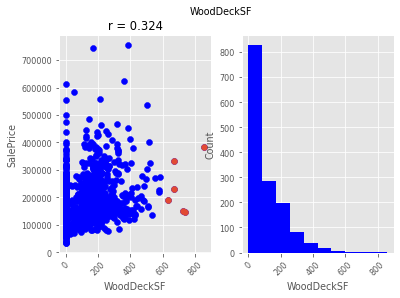

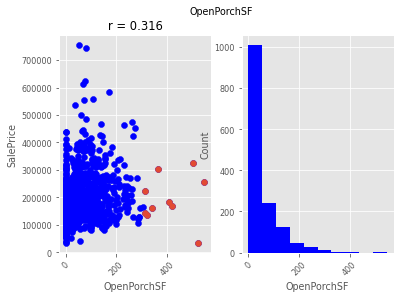

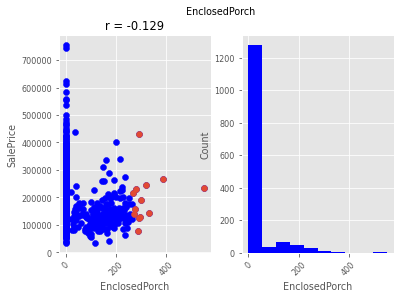

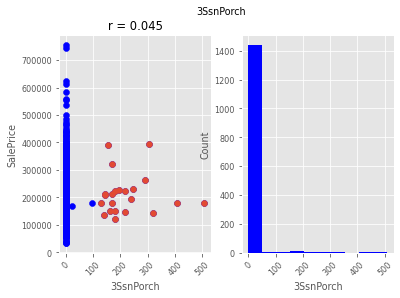

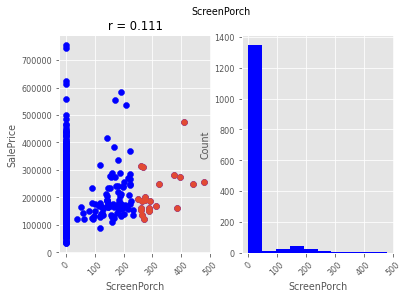

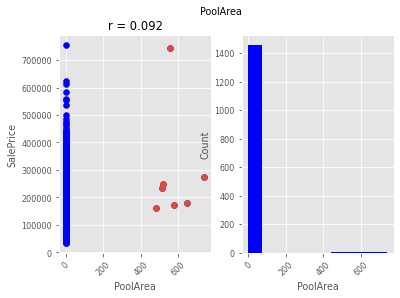

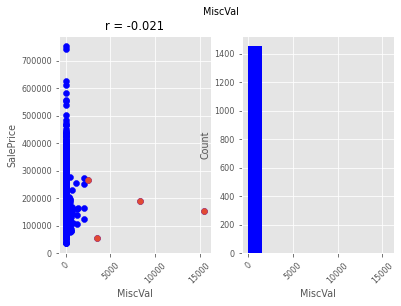

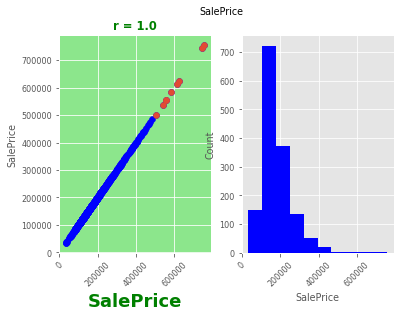

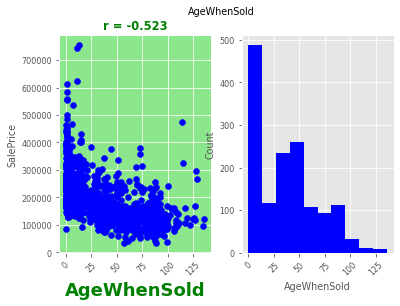

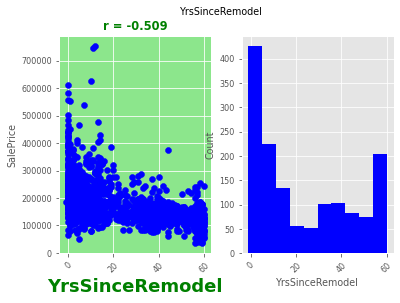

In [17]:
import numpy.ma as ma # need this to allow corrcoef to handle the nan rows

for nvar in numlist:
    fig, axs = plt.subplots(1,2)
    fig.suptitle(nvar)
    
    # Histogram
    axs[1].hist(train0[nvar],color='b')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel(nvar)
    
    # Which indices have z-scores > 4
    zvals = stats.zscore(train0[nvar])
    indx = np.where(abs(zvals) > 4)

    # Scatter
    axs[0].scatter(train0[nvar],train0['SalePrice'],color='b')
    axs[0].scatter(train0.loc[indx,nvar],
                   train0.loc[indx,'SalePrice']) # z-scores > 4
    
    r = ma.corrcoef(ma.masked_invalid(train0[nvar]), 
                ma.masked_invalid(train0['SalePrice']))
    
    if np.abs(r[0,1]) >= corr_thrshld:
        axs[0].set_title(('r = '+ str(round(r[0,1],3))), fontweight = 'bold',color='g')
        axs[0].set_facecolor('#8ce68c')
        axs[0].set_xlabel(nvar, fontsize = 18, fontweight = 'bold',color='g')
        
    elif np.abs(r[0,1]) < corr_thrshld:
        axs[0].set_title(('r = ' + str(round(r[0,1],3))))
        axs[0].set_xlabel(nvar)
    
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].set_ylabel('SalePrice')

In [18]:
# Correlations between Output variable and other numerical variables
correlations = num_train.corr()
ycorr = correlations['SalePrice']
ycorr[np.abs(ycorr)>corr_thrshld]
#x = ycorr[np.abs(ycorr)>corr_thrshld]

MasVnrArea         0.477493
TotalBsmtSF        0.613581
1stFlrSF           0.605852
GrLivArea          0.708624
FullBath           0.560664
TotRmsAbvGrd       0.533723
Fireplaces         0.466929
GarageCars         0.640409
GarageArea         0.623431
SalePrice          1.000000
AgeWhenSold       -0.523350
YrsSinceRemodel   -0.509079
Name: SalePrice, dtype: float64

In [19]:
# manually created this, figure out how to do it automatically above
hcorr_list = ['AgeWhenSold','YrsSinceRemodel',
              'MasVnrArea','TotalBsmtSF', 
             '1stFlrSF','GrLivArea','FullBath',
             'TotRmsAbvGrd','Fireplaces',
             'GarageCars','GarageArea']

## B. The Categorical Variables

In [43]:
cattypes = ['O']
cat_train = train0.select_dtypes(include=cattypes)
catlist = list(cat_train)
print(len(catlist),' categorical variables')
catlist

51  categorical variables


['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

# III. PREPROCESSING - Preparation for Model Training

<ipython-input-65-af096ca90273>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (15,8))


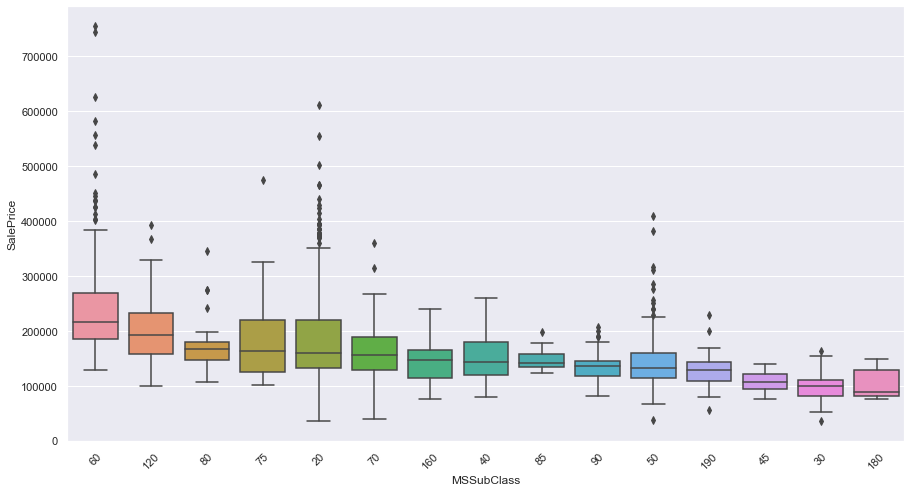

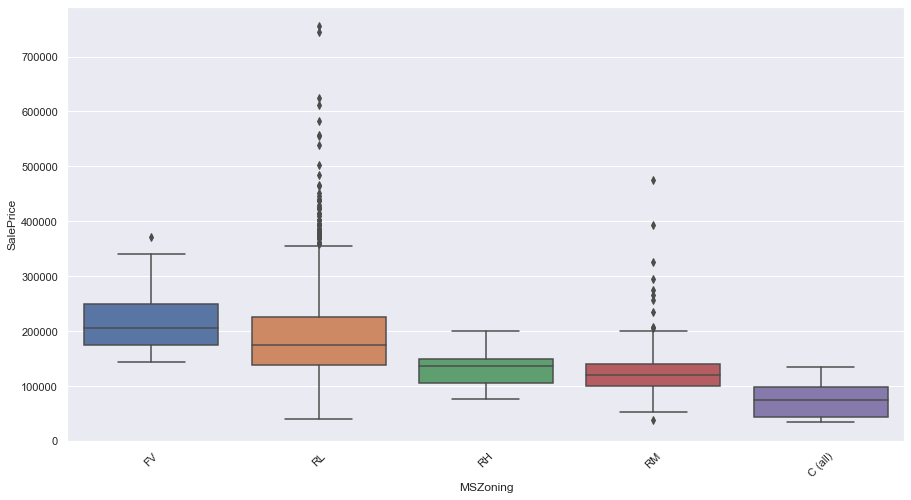

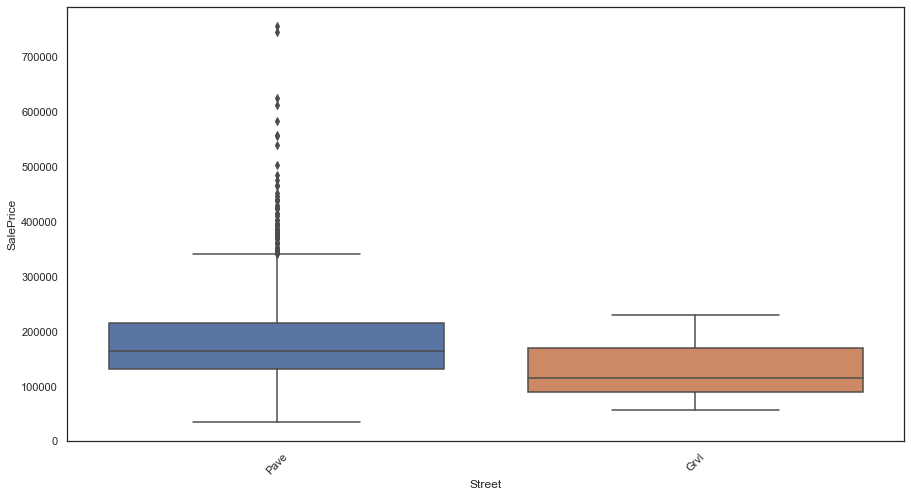

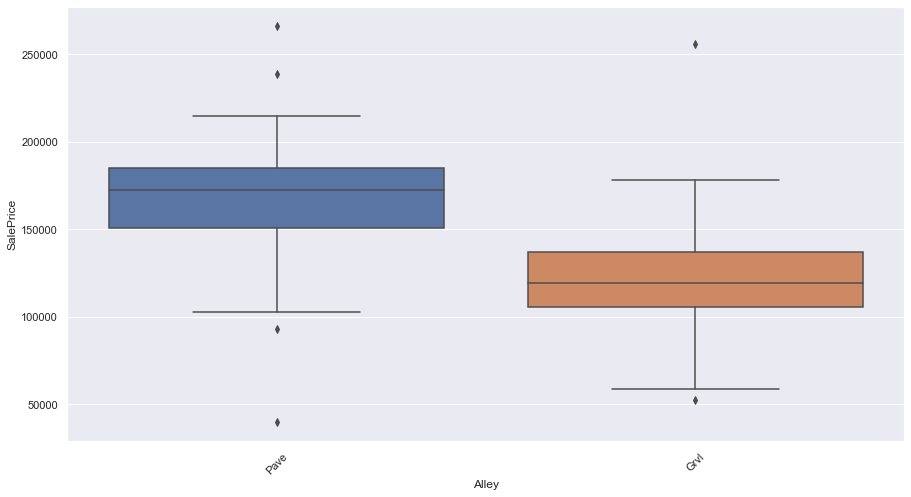

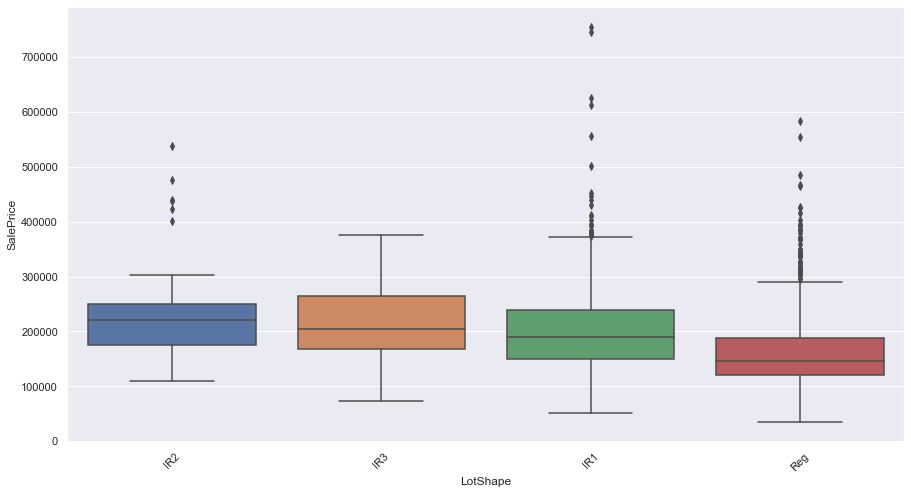

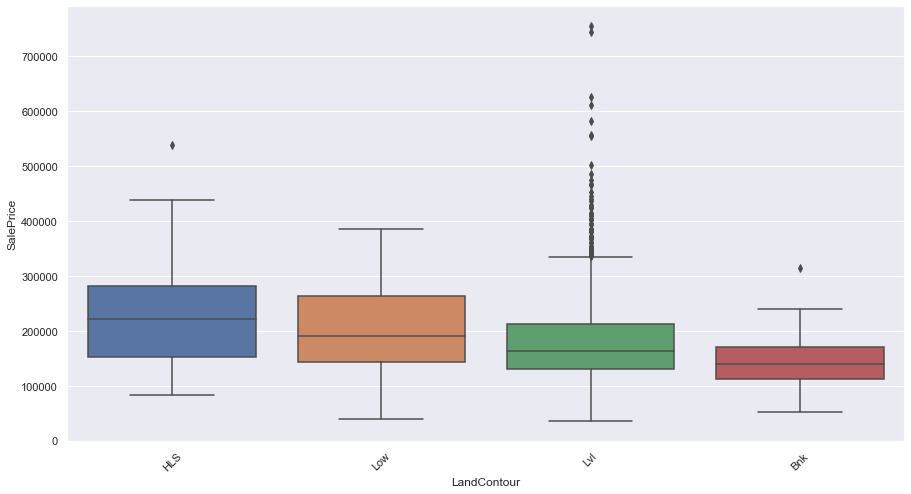

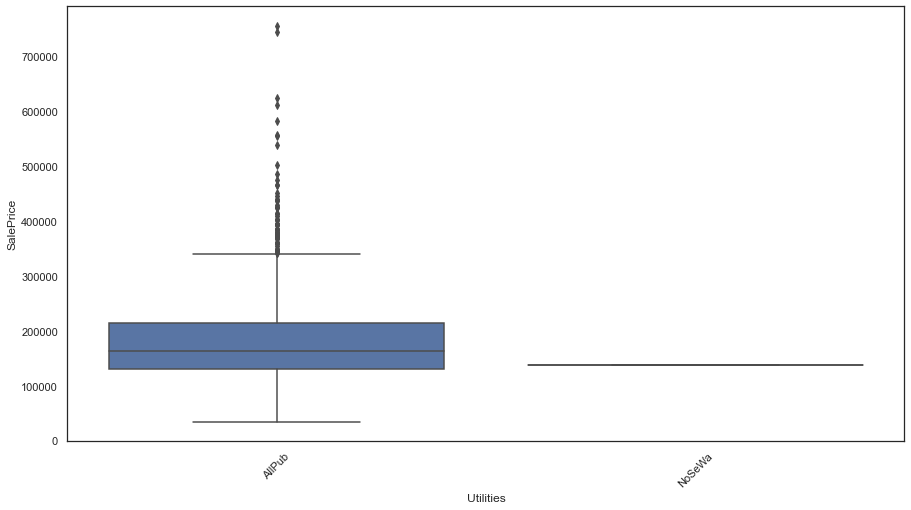

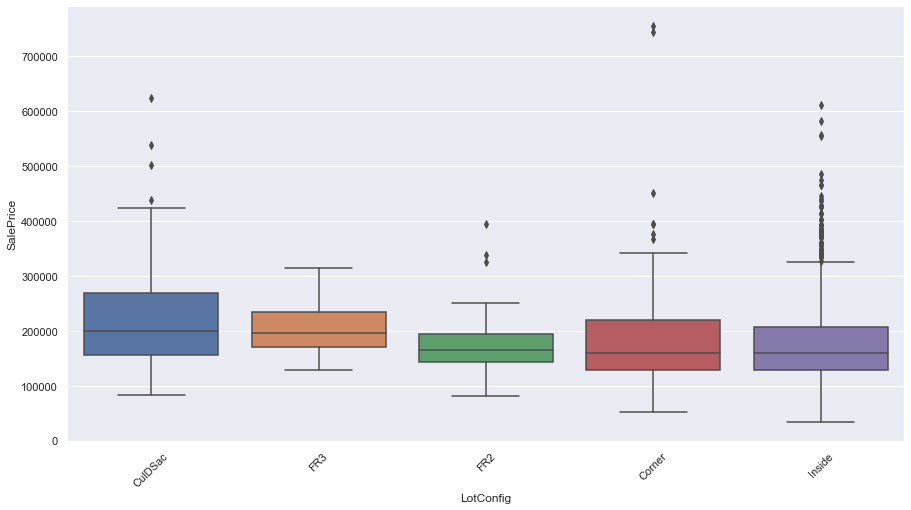

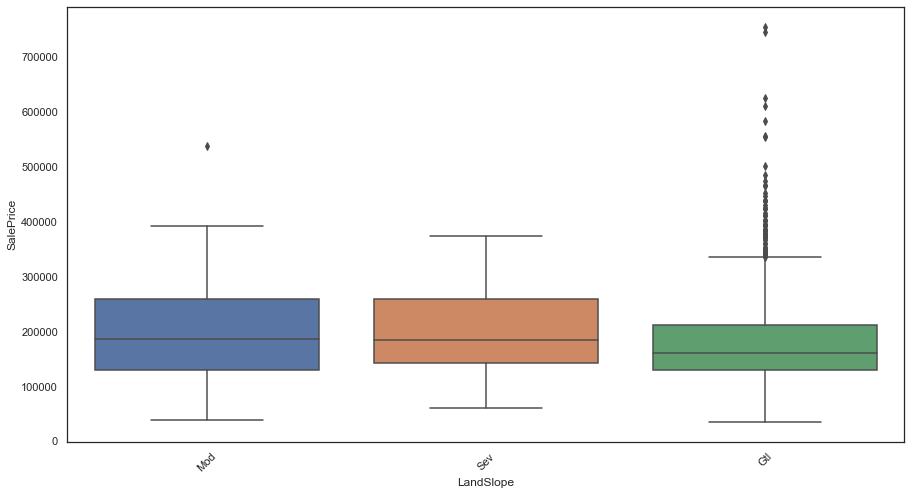

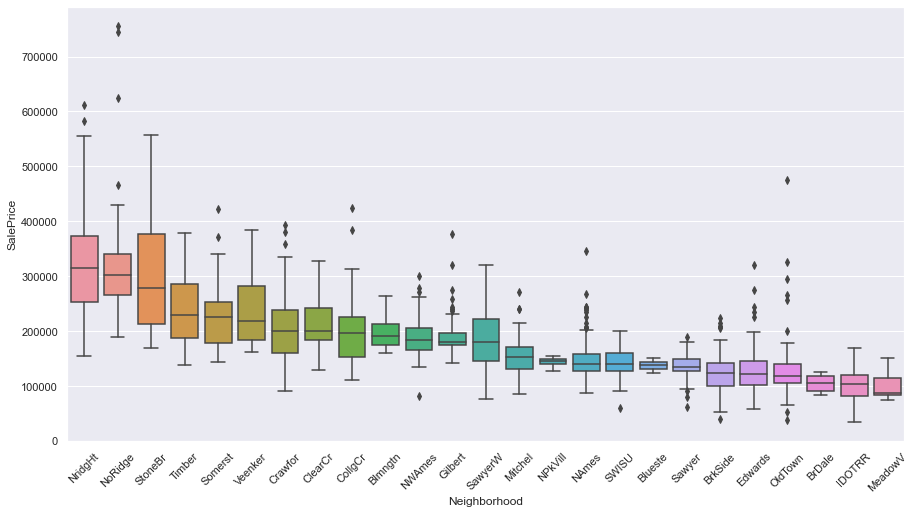

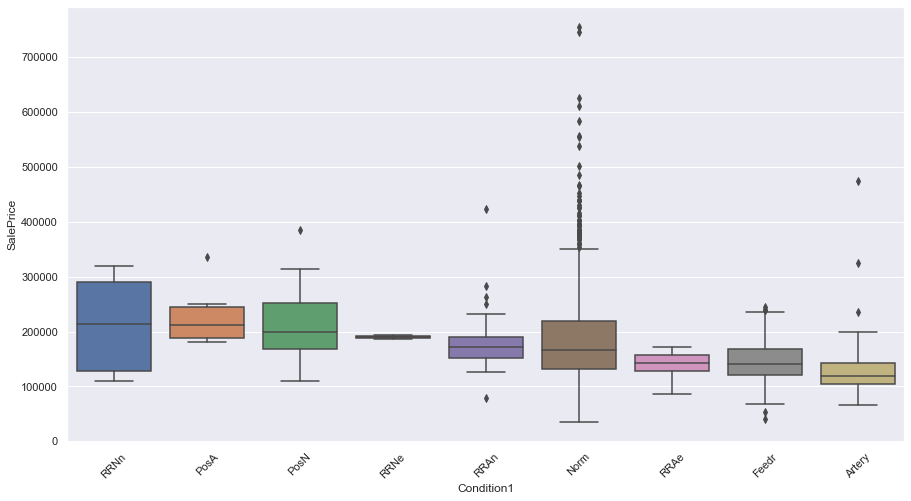

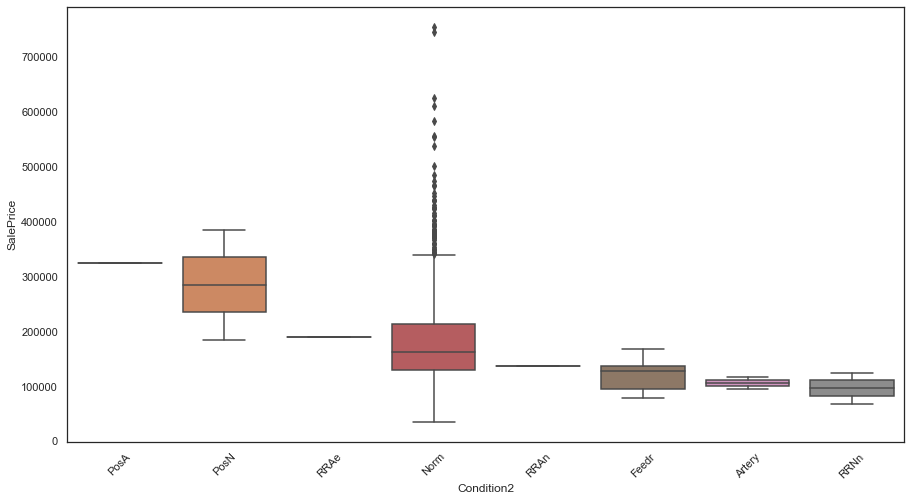

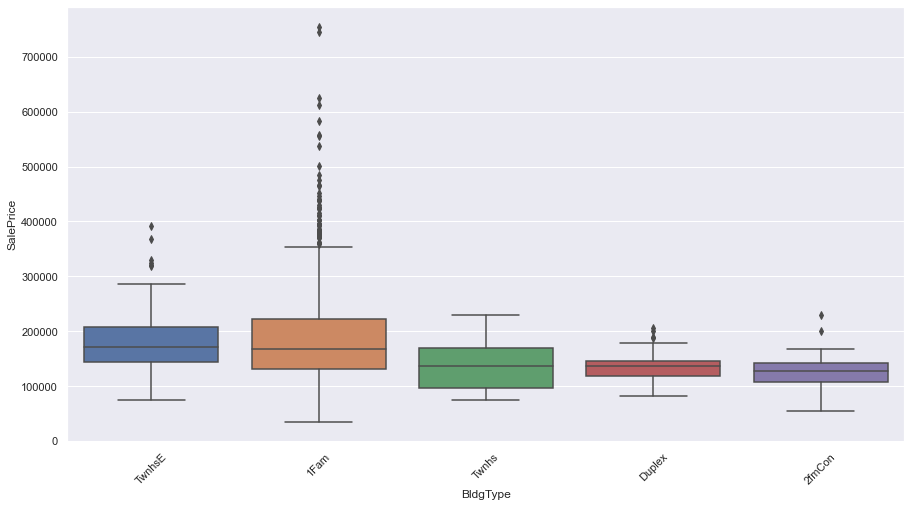

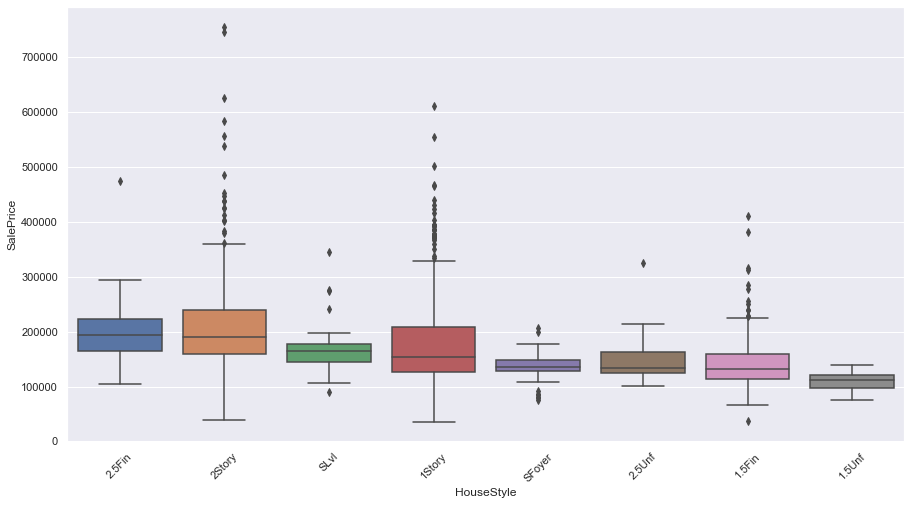

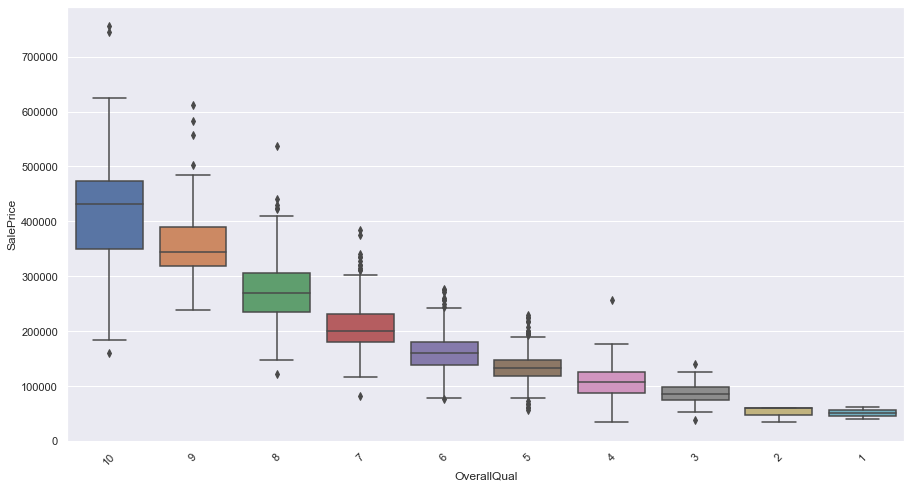

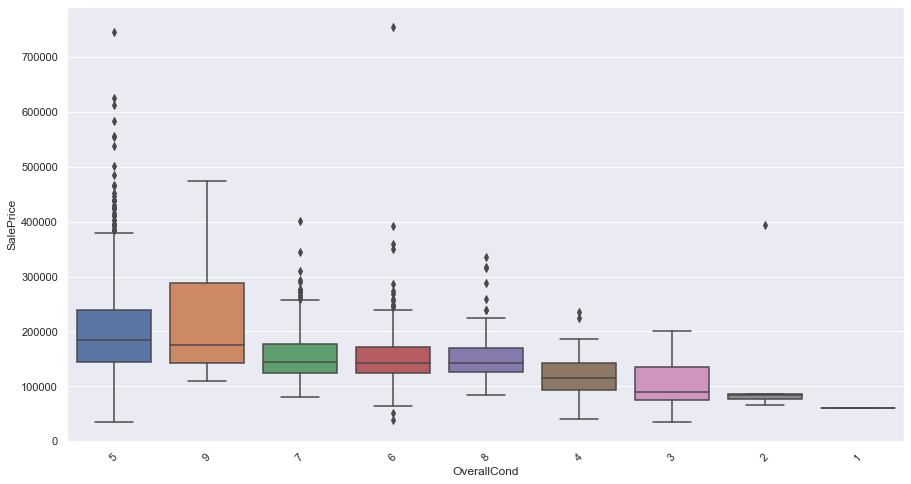

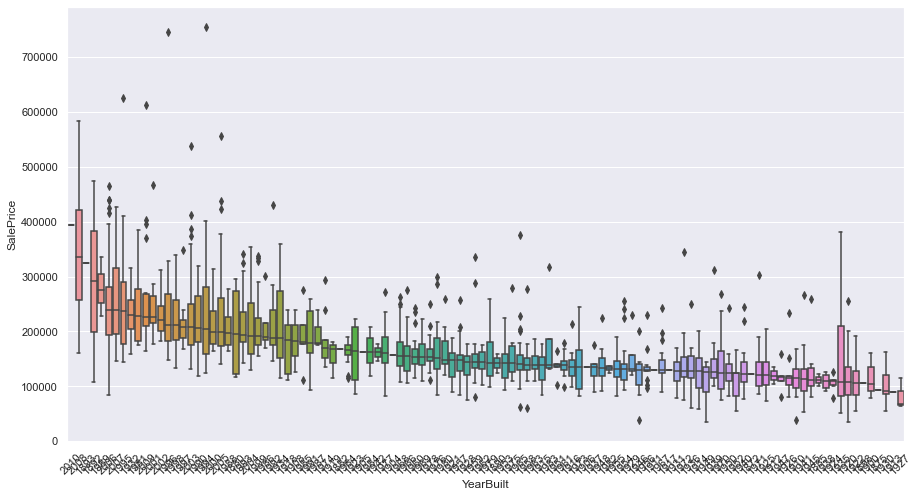

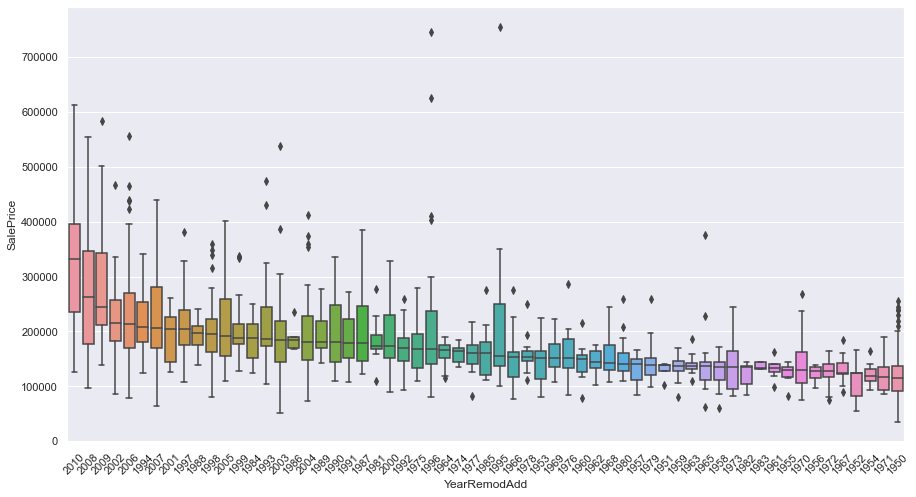

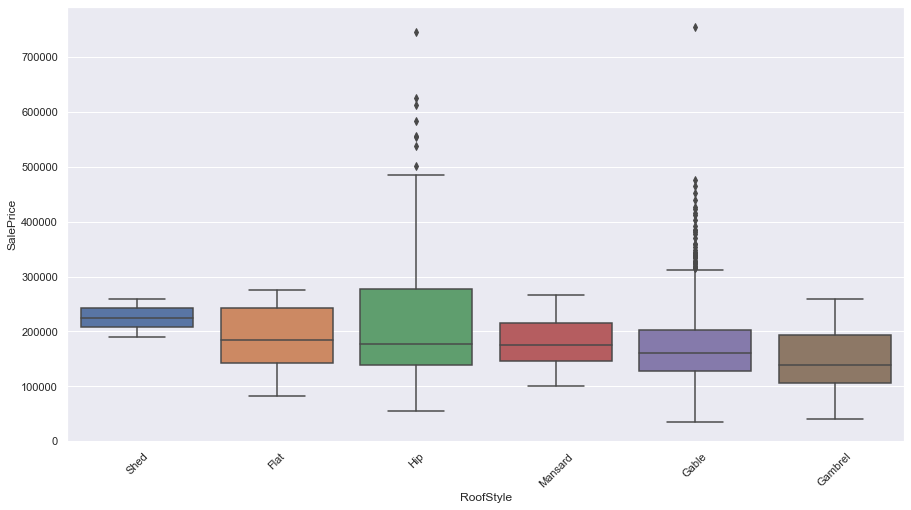

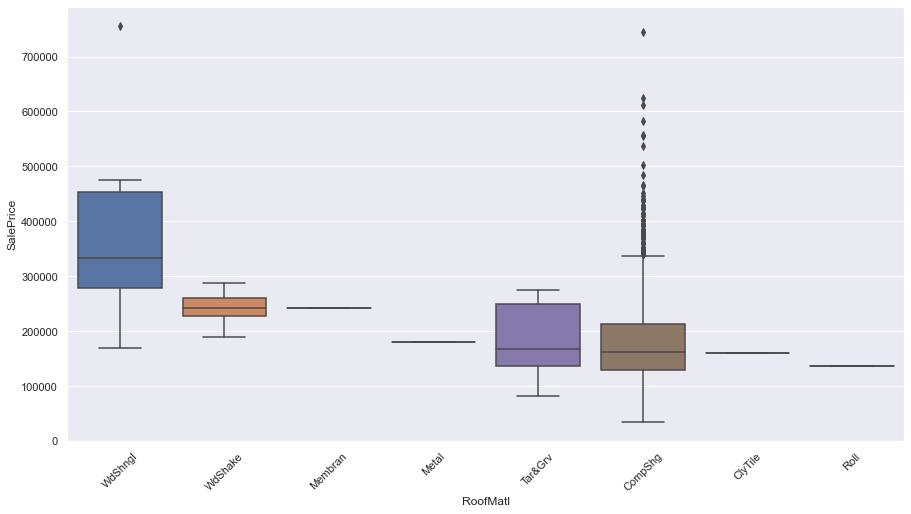

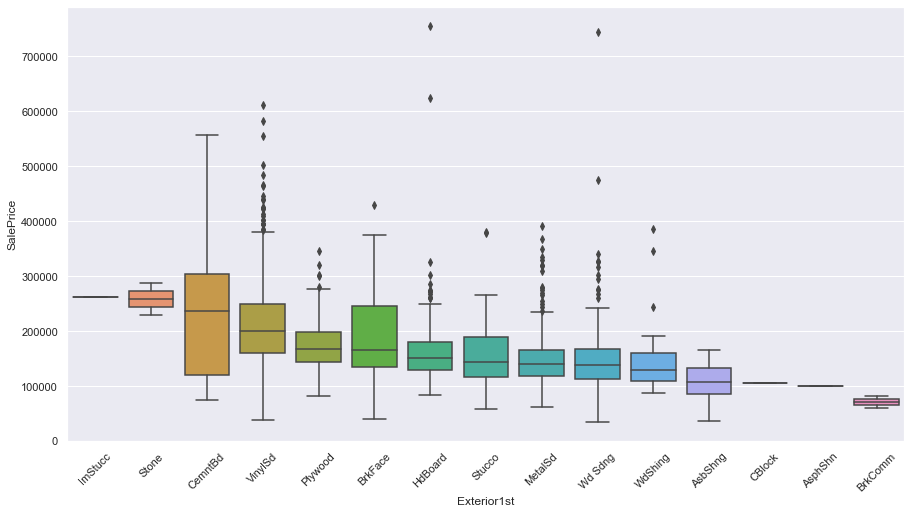

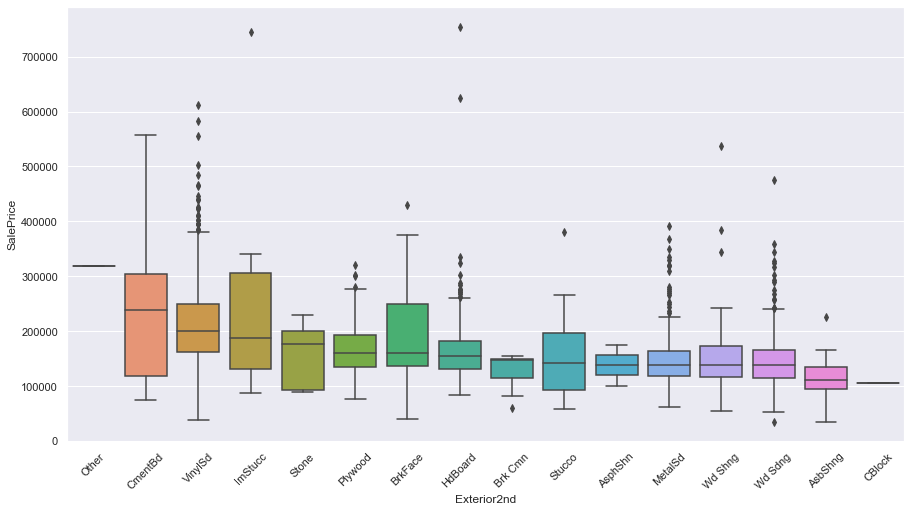

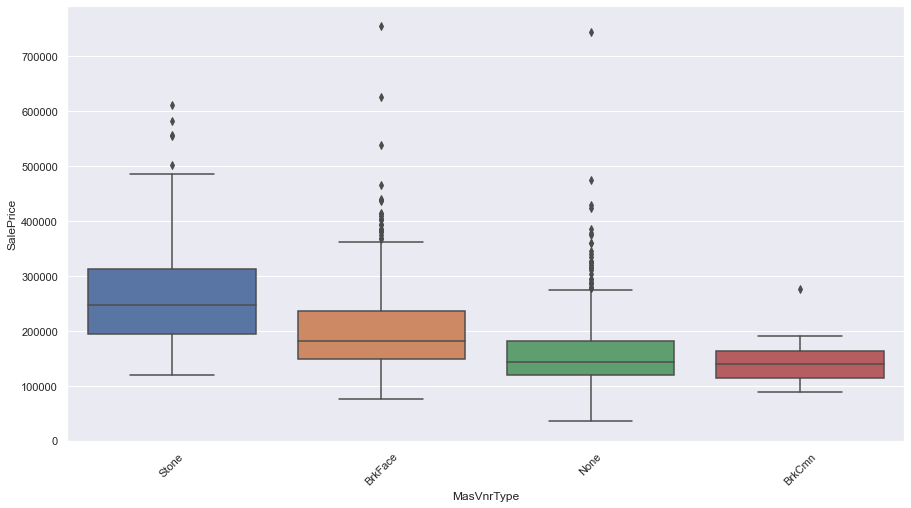

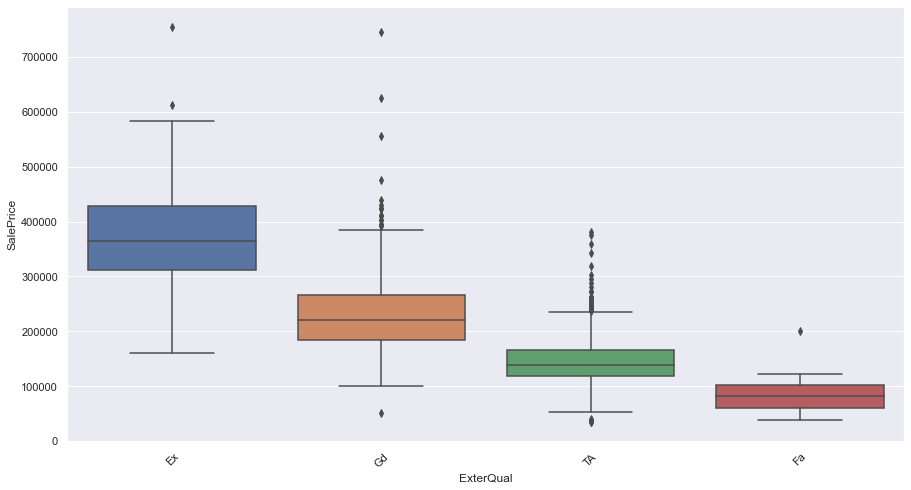

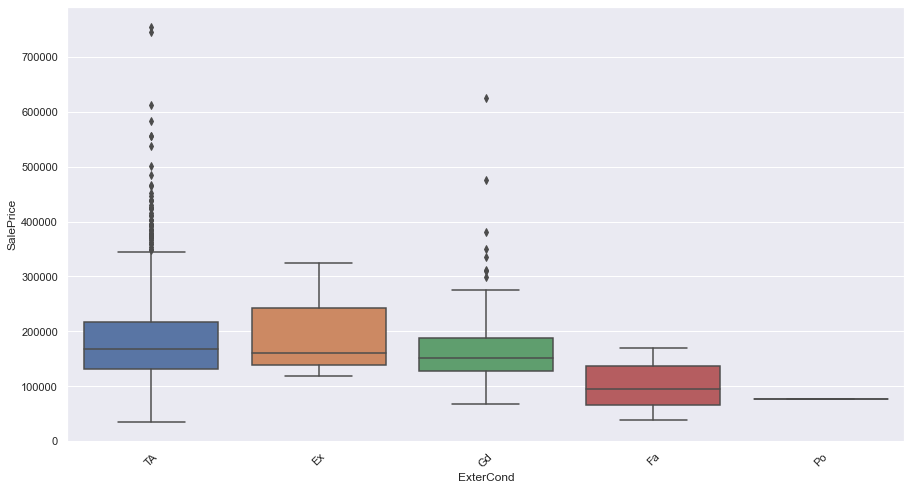

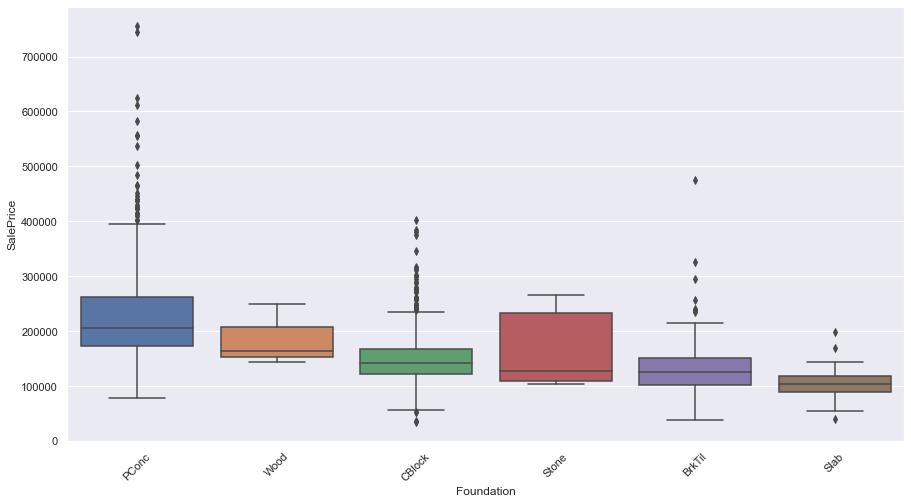

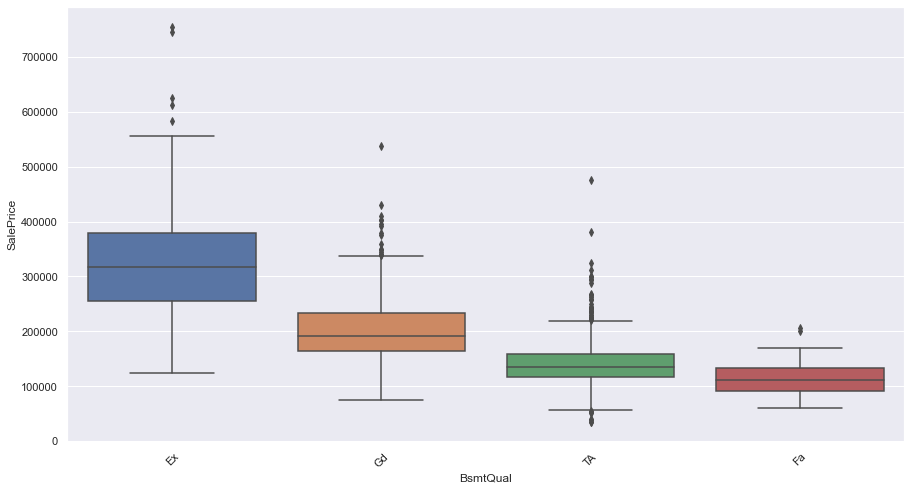

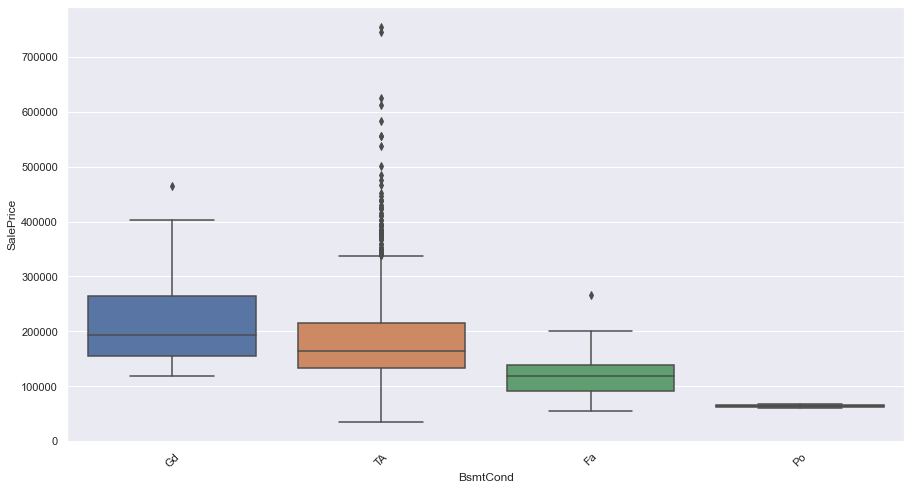

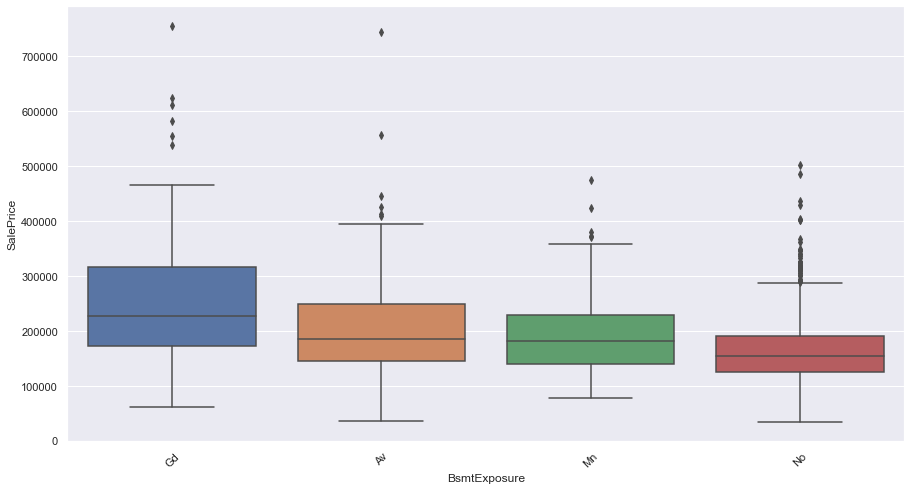

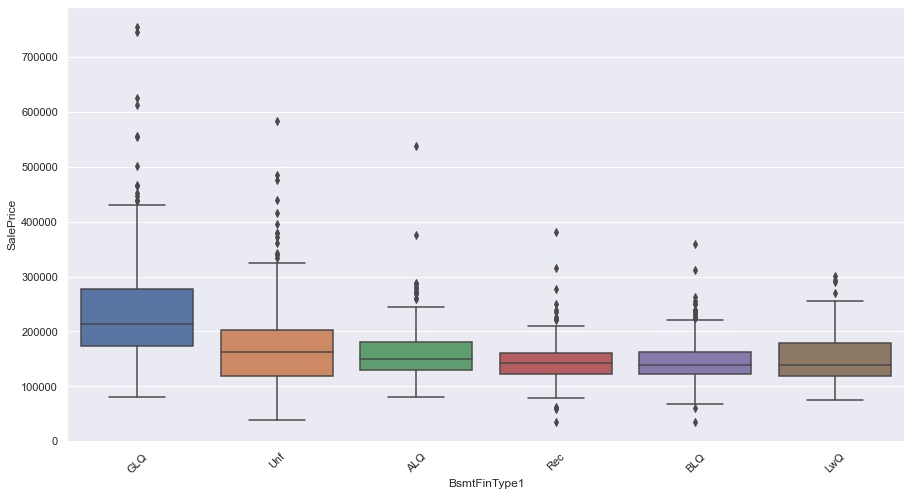

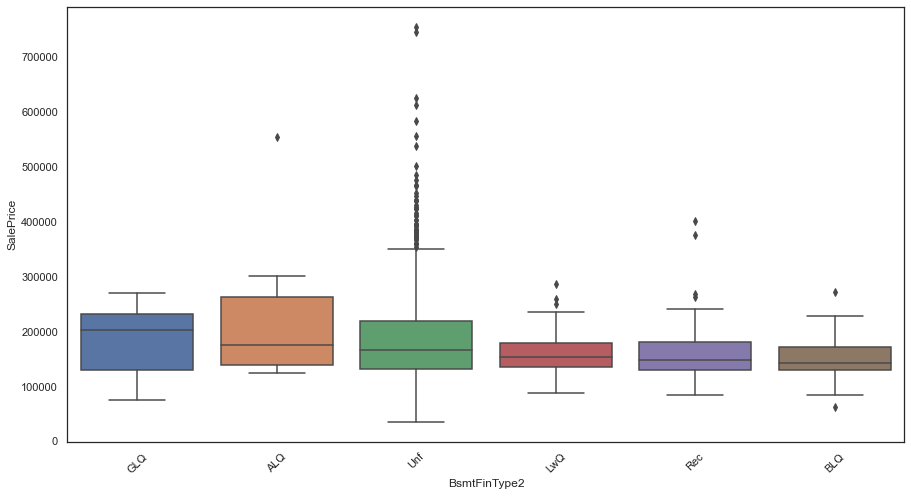

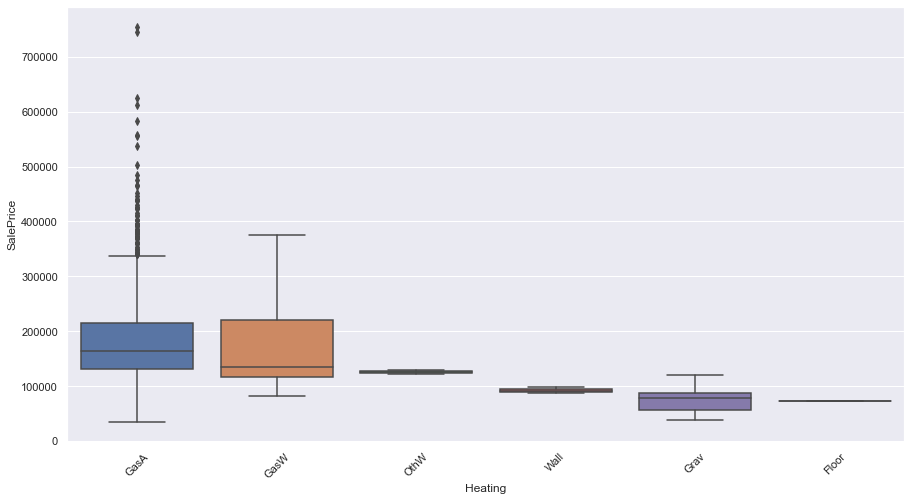

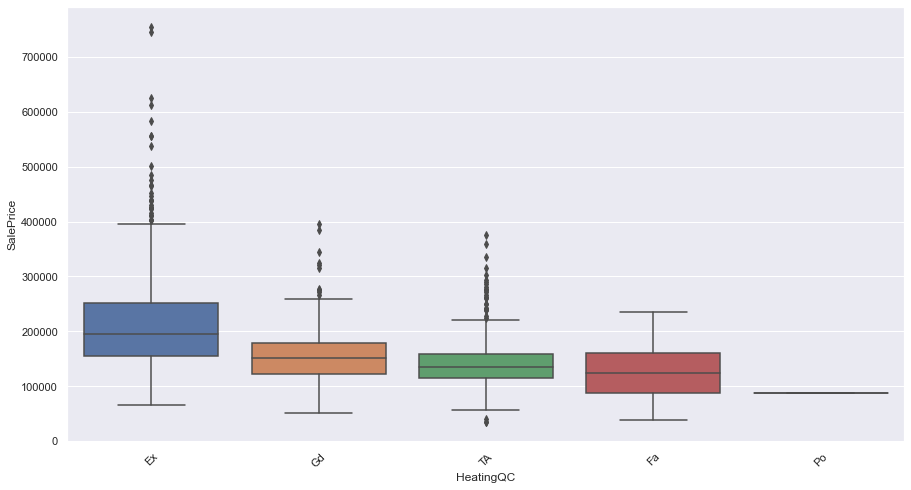

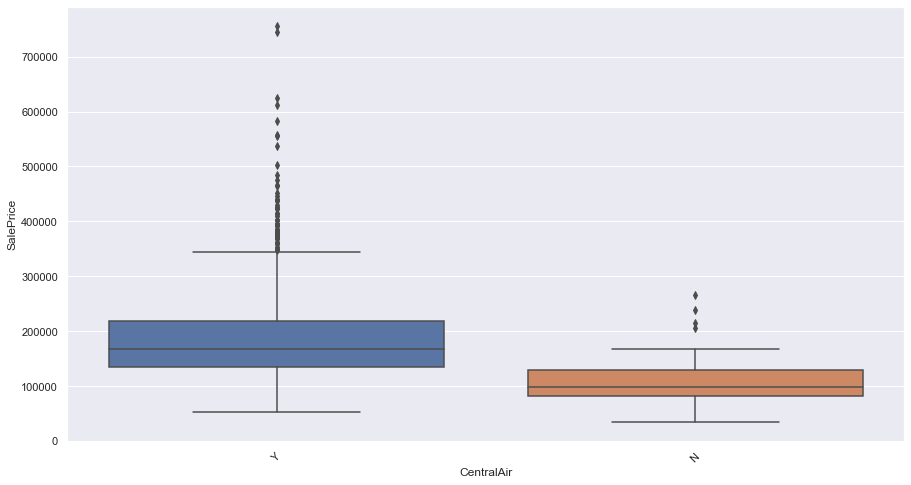

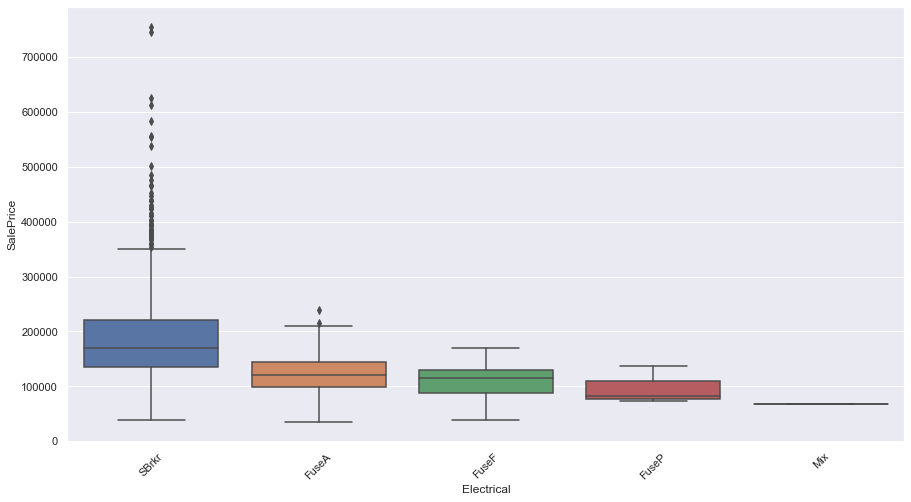

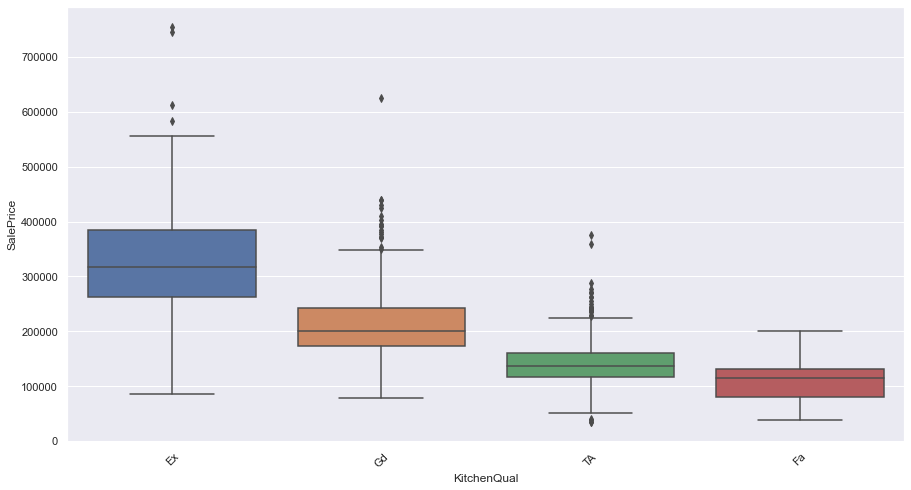

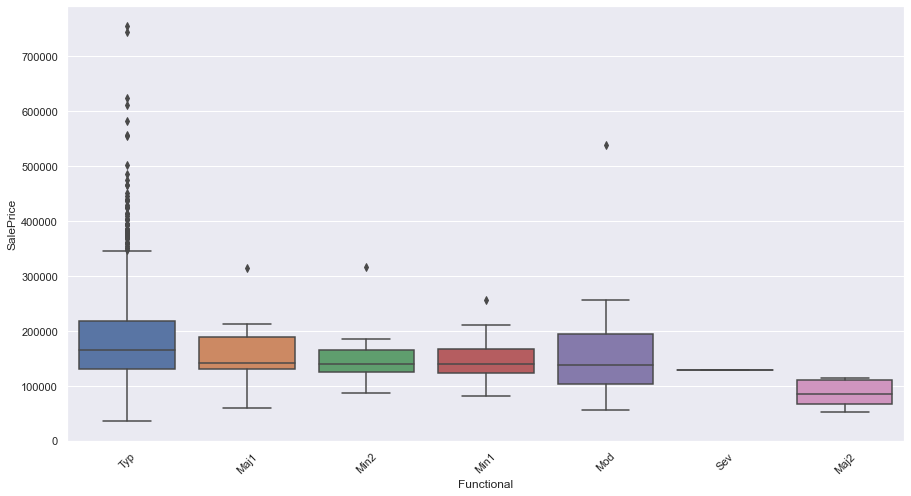

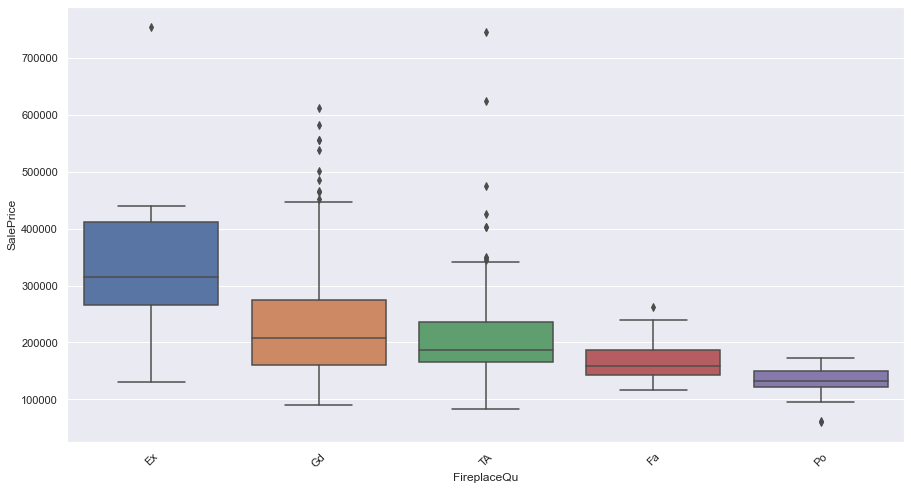

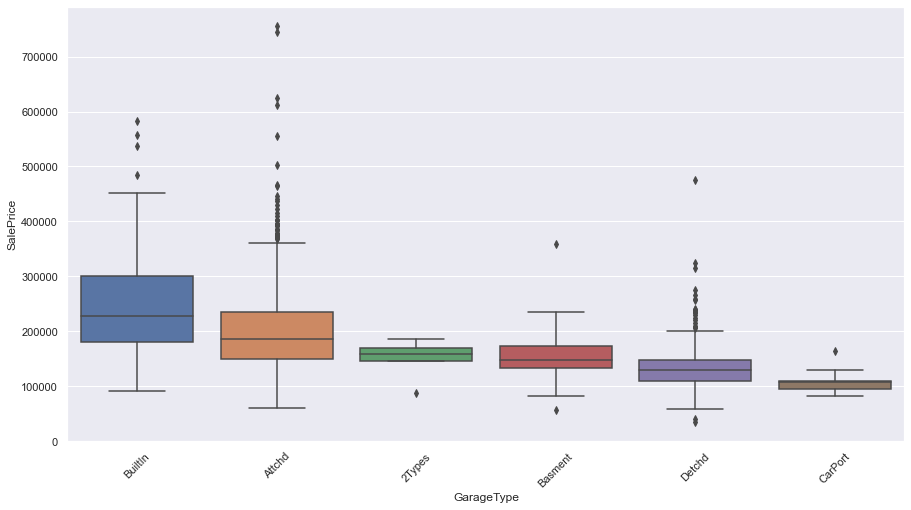

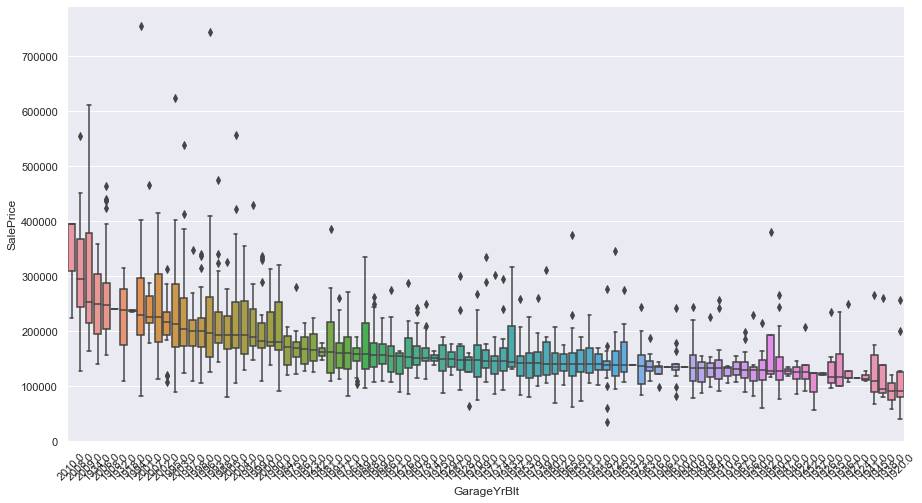

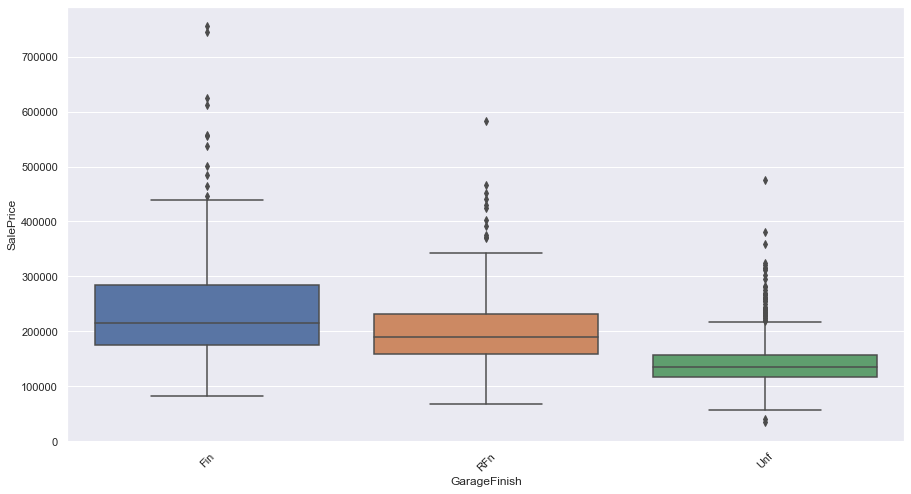

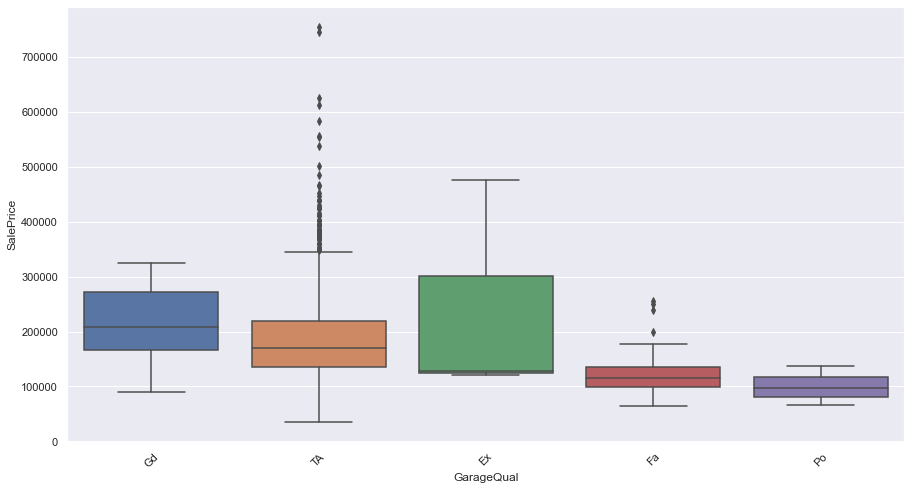

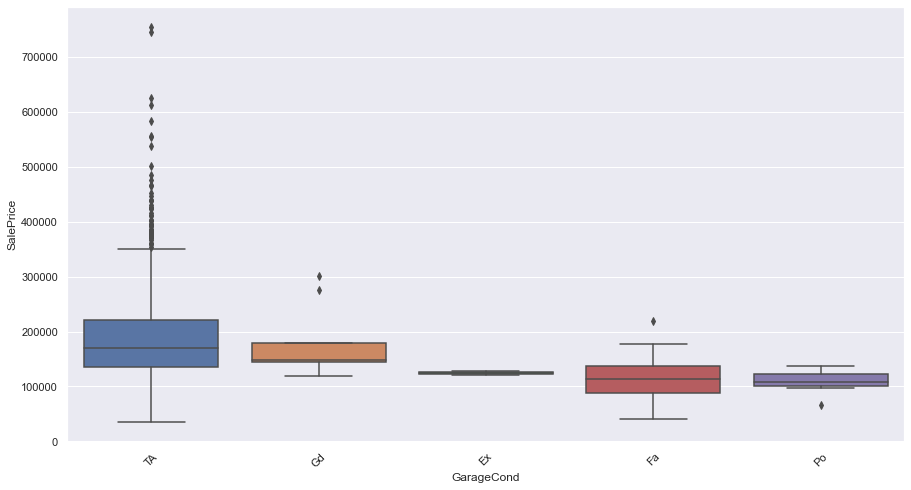

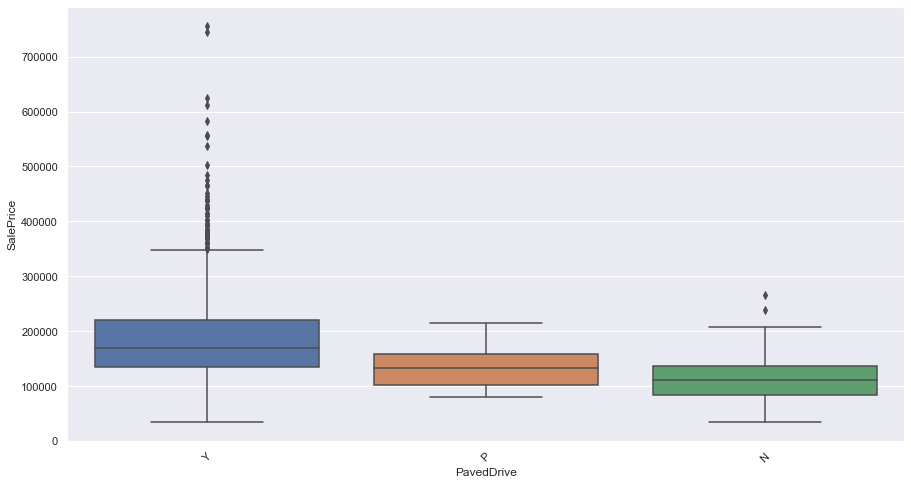

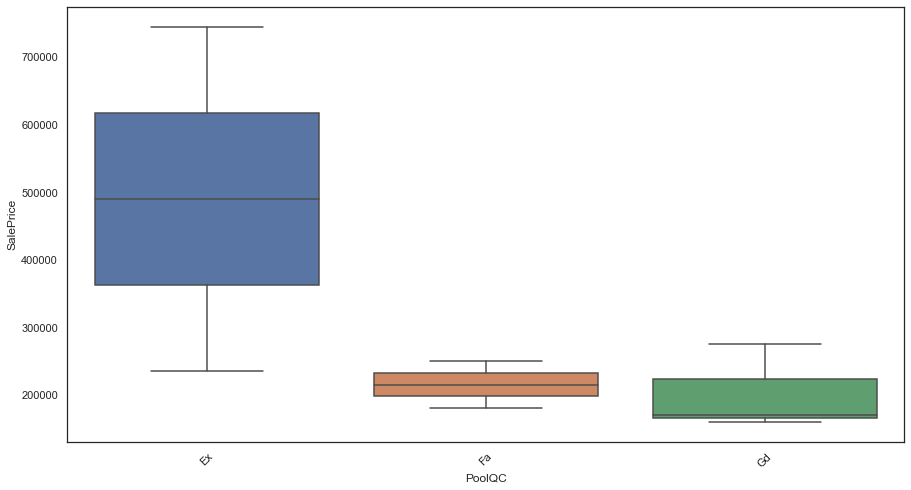

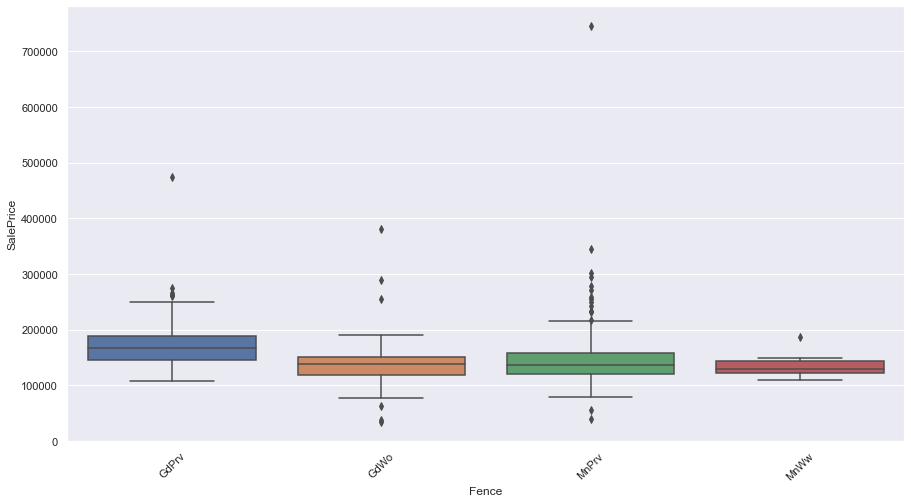

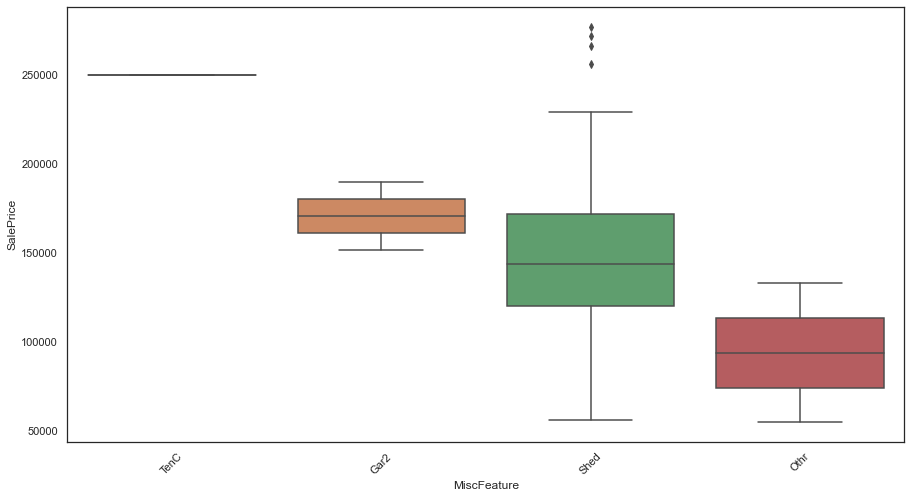

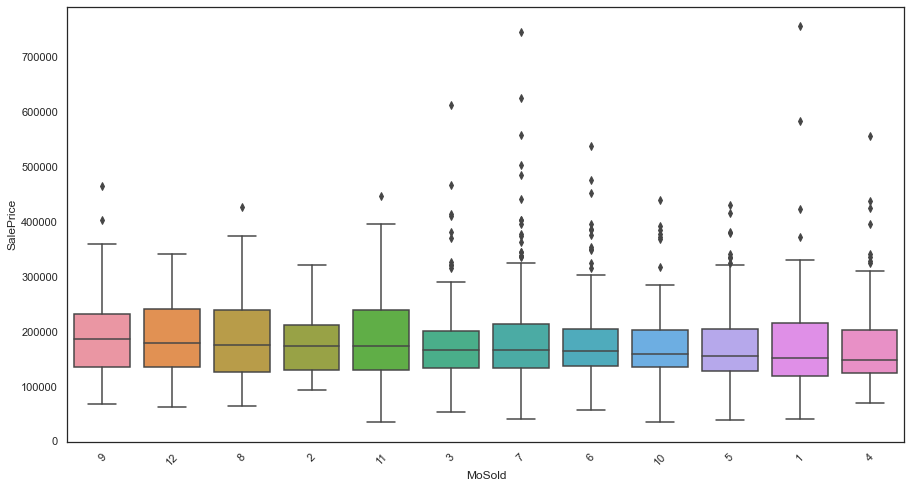

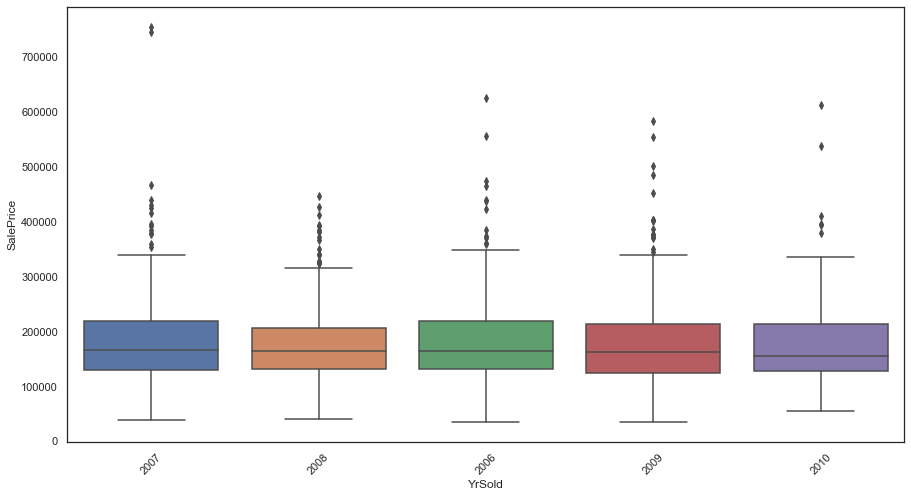

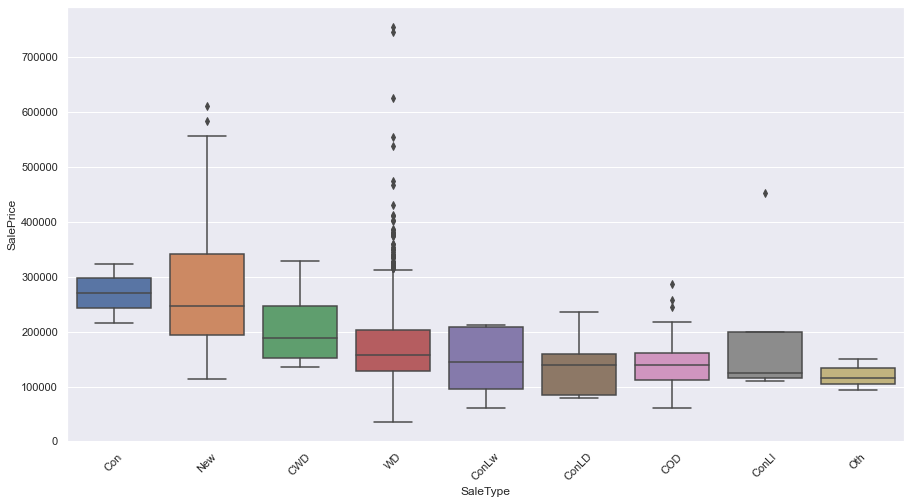

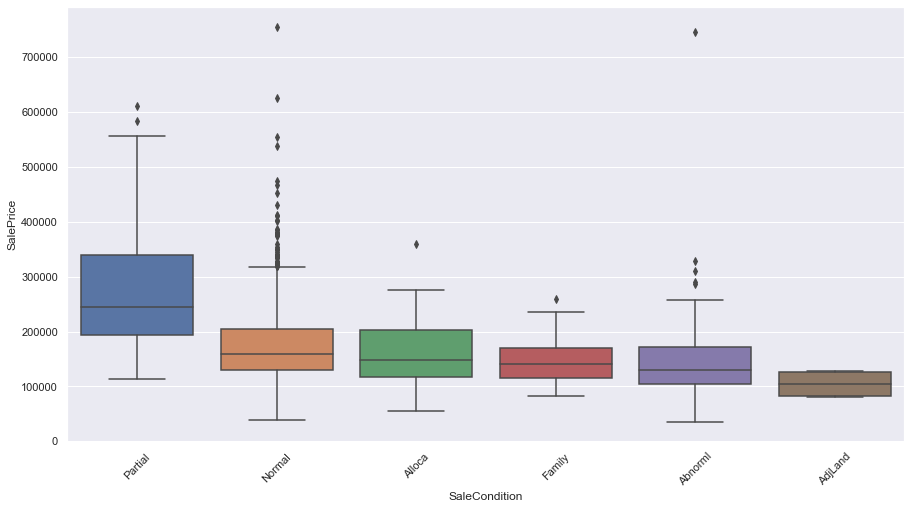

In [65]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

for cvar in catlist:   
    # Group Difference
    mstr = 'SalePrice ~ ' + cvar
    mod = ols(mstr,data=train0).fit()                
    aov_table = sm.stats.anova_lm(mod, typ=2)

    # ---------------------------------
    # The Figure
    # ---------------------------------
    sns.set(rc={'figure.facecolor':'white'})

    plt.figure(figsize = (15,8))   
    
    # Ordering by median
    temp = train0.groupby([cvar])['SalePrice'].median().sort_values(ascending=False).reset_index()   
    
    # Boxplot
    if aov_table['PR(>F)'][0] >= 0.01:
        with sns.axes_style("white"):
            sns.boxplot(x=train0[cvar], 
                y=train0['SalePrice'],
                order = list(temp[cvar]))
            
    elif aov_table['PR(>F)'][0] < 0.01:
        with sns.axes_style("darkgrid"):
            sns.boxplot(x=train0[cvar], 
                y=train0['SalePrice'],
                order = list(temp[cvar]))
    
    plt.xticks(rotation=45)
    #ax.tick_params(axis='x', rotation=45)
    #ax.set_ylabel('Sale Price')
    #ax.set_xlabel(cvar)

## 3A. Imputation - Numerical Variables

In [ ]:
# How many Missing Values?
num_train.isna().sum()

In [ ]:
num_miss = list(num_train.columns[np.where(num_train.isna().sum() > 0)])
print('The Numerical Variables that are missing data:')
list(num_miss)

## * LotFrontage

Lot Frontage (Continuous): Linear feet of street connected to property

In [ ]:
train0['LotFrontage'].isnull().sum()

In [ ]:
# Checking the LotConfig values
train0[train0['LotFrontage'].isnull()]['LotConfig'].unique()

There are no obvious discrepancies observed with these missing data. Because I believe these homes do not have street connected to the property. Therefore I will replace the missing data with zero. 

In [ ]:
# ACTION: Let's change the LotFrontage to 0.0, for the LotFrontage = NaN rows 
train0.loc[(train0['LotFrontage'].isnull()),'LotFrontage']= 0.0

In [ ]:
# Checking if the change was made
train0['LotFrontage'].isnull().sum()

## * MasVnrArea

(Google) A masonry veneer is an outer layer of brick or stone on a building. Masonry veneer is a construction material used on the exterior walls of homes and commercial buildings. It is comprised of thin pieces of brick or stone, and gives the appearance of solid masonry without the associated weight and cost.

MasVnrArea (Continuous): Masonry veneer area in square feet

MasVnrType (Nominal): Masonry veneer type

In [ ]:
train0['MasVnrType'].unique()

In [ ]:
# How many missing again?
train0['MasVnrArea'].isnull().sum()

In [ ]:
# For these 'MasVnrArea' = nan, what'MasVnrType's do we have?
train0[train0['MasVnrArea'].isnull()]['MasVnrType'].unique()

In [ ]:
# ACTION: Let's change the MasVnrType to 'None', for the MasVnrArea = NaN rows 
train0.loc[(train0['MasVnrArea'].isnull()),'MasVnrType']='None'

# ACTION: Let's change the MasVnrArea to 0.0, for the MasVnrArea = NaN rows 
train0.loc[(train0['MasVnrArea'].isnull()),'MasVnrArea']= 0.0

In [ ]:
train0['MasVnrType'].unique()

In [ ]:
print('MasVnrArea = nan are gone')
train0['MasVnrArea'].isnull().sum()

#### Another Discrepancy
- Here you see that some of the 'MasVnrType' == 'None' rows, have 'MasVnrArea' that are not equal to 0.0

In [ ]:
print('Another issue... This does NOT make sense:')
train0[(train0['MasVnrType']=='None') & (train0['MasVnrArea']!=0)]['MasVnrArea']

In [ ]:
np.where([(train0['MasVnrType']=='None') & (train0['MasVnrArea']!=0)])

In [ ]:
# Remove these rows????? 
#train0 = train0.drop(labels=[624,773,1230,1300,1334], axis=0)

In [ ]:
train0[(train0['MasVnrType']=='None') & (train0['MasVnrArea']!=0)]['MasVnrArea']

### Zeros

In [ ]:
# Count number of zeros in all columns of Dataframe
for column_name in num_train.columns:
    column = num_train[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    if count != 0: 
        print('Count of zeros in column ', column_name, ' is : ', count)

In [ ]:
print('Zeros could be reasonable, come back here later')

## 3B. Imputation - Categorica Variables

In [ ]:
# How many Missing Values?
cat_train.isna().sum()

In [ ]:
cat_miss = list(cat_train.columns[np.where(cat_train.isna().sum() > 0)])
print('The Categorical Variables that are missing data:')
list(cat_miss)

In [ ]:
# Checking the values available for each categorical variable
for cvar in cat_miss:
    print(cvar, train0[cvar].unique())

### Alley

In [ ]:
print(train0['Alley'].unique())

In [ ]:
train0.loc[(train0['Alley'].isna()),'Alley']= 'NoAlley'

In [ ]:
print(train0['Alley'].unique())

### MasVnrType

I examined this variable above, when looking at the numerical variable MasVnrArea. See above comments. 

### Basement Variables 

Looking closer at the rows with missing data, the data_description.txt file indicates that these houses have "No Basement". If any of these categorical variables (listed here) have NA. 
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2

  - NA	➡➡➡  No Basement

In [ ]:
# Grabbing the indices when each bsmt variabes have missing values
# in the data_description.txt, na should mean "No Basement"
bsmt_1 = np.where(train0['BsmtQual'].isna())
bsmt_2 = np.where(train0['BsmtCond'].isna())
bsmt_3 = np.where(train0['BsmtExposure'].isna())
bsmt_4 = np.where(train0['BsmtFinType1'].isna())
bsmt_5 = np.where(train0['BsmtFinType2'].isna())

In [ ]:
all_NoBsmt_rows = np.concatenate((bsmt_1, 
                                  bsmt_2, 
                                  bsmt_3, 
                                  bsmt_4,
                                  bsmt_5), axis=None)

In [ ]:
No_Bsmt_rows = np.unique(all_NoBsmt_rows)
print('These particular rows should have no basements, lets verify.')
print(No_Bsmt_rows)

In [ ]:
# lets look at these basement categorical variables 
bsmt_cvars = ['BsmtQual',
             'BsmtCond',
             'BsmtExposure',
             'BsmtFinType1',
             'BsmtFinType2']

print('For these indices, these values exist:')
print('Expecting nan values:')
print('\n')

for bcvar in bsmt_cvars:
    
    print(bcvar,
          No_Bsmt_rows[np.where(train0.loc[No_Bsmt_rows,bcvar].notna())],
          train0.loc[No_Bsmt_rows,bcvar].unique())

In [ ]:
# lets look at these basement numerical variables 
bsmt_nvars = ['BsmtFinSF1', 
             'BsmtFinSF2', 
             'BsmtUnfSF', 
             'TotalBsmtSF', 
             'BsmtFullBath', 
             'BsmtHalfBath']     

for nvar in bsmt_nvars:
    fig, axs = plt.subplots(1,2)
    fig.suptitle(nvar)
    
    # Histogram
    axs[1].hist(train0[nvar],color='k')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel(nvar)
    
    # Scatter
    axs[0].scatter(train0[nvar],train0['SalePrice'],color='k')
    
    # -------------------------------------------------------------------------------
    # Plotting the "no basement" rows to examine if these variables exhibit ZEROs
    # -------------------------------------------------------------------------------
    axs[0].scatter(train0.loc[No_Bsmt_rows,nvar],train0.loc[No_Bsmt_rows,'SalePrice'])

    print(nvar, 'indices with samples > 0', No_Bsmt_rows[np.where(train0.loc[No_Bsmt_rows, nvar]>0)])
    
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].set_ylabel('SalePrice')
    axs[0].set_xlabel(nvar)

In [ ]:
print('This row does not make sense. BsmtFinType2 = NaN,')
print('BUT, there is a value for BsmtFinSF2 = 479.')
print('Lets consider dropping this row,')
print('Because BsmtFinType2 = ???? who knows\n')

print(train0.loc[332,['BsmtQual',
             'BsmtCond', 
             'BsmtExposure', 
             'BsmtFinType1',
             'BsmtFinType2',
             'BsmtFinSF1', 
             'BsmtFinSF2', 
             'BsmtUnfSF', 
             'TotalBsmtSF', 
             'BsmtFullBath', 
             'BsmtHalfBath']])

In [ ]:
print('Okay, this row is OK. BsmtExposure = NaN.')
print('But clearly there is a basement (unfinished).')
print('ACTION: Changing BsmtExposure = No\n')
print(train0.loc[948,['BsmtQual',
             'BsmtCond', 
             'BsmtExposure', 
             'BsmtFinType1',
             'BsmtFinType1',
             'BsmtFinSF1', 
             'BsmtFinSF2', 
             'BsmtUnfSF', 
             'TotalBsmtSF', 
             'BsmtFullBath', 
             'BsmtHalfBath']])

In [ ]:
print(train0.loc[948,'BsmtExposure'])
train0.loc[948,'BsmtExposure']='No'
print(train0.loc[948,'BsmtExposure'])

Okay change these rows to 'NoBsmt'

In [ ]:
bsmt_cvars

In [ ]:
print(np.where(train0['BsmtQual'].isna()))
train0.loc[(train0['BsmtQual'].isna()),'BsmtQual']='NoBsmt'
print('Missing values? :', np.where(train0['BsmtQual'].isna()))

In [ ]:
print(np.where(train0['BsmtCond'].isna()))
train0.loc[(train0['BsmtCond'].isna()),'BsmtCond']='NoBsmt'
print('Missing values? :', np.where(train0['BsmtCond'].isna()))

In [ ]:
print(np.where(train0['BsmtExposure'].isna()))
train0.loc[(train0['BsmtExposure'].isna()),'BsmtExposure']='NoBsmt'
print('Missing values? :', np.where(train0['BsmtExposure'].isna()))

In [ ]:
print(np.where(train0['BsmtFinType1'].isna()))
train0.loc[(train0['BsmtFinType1'].isna()),'BsmtFinType1']='NoBsmt'
print('Missing values? :', np.where(train0['BsmtFinType1'].isna()))

In [ ]:
# Remove row 332 from this index list
# bsmt_5 = np.where(train0['BsmtFinType2'].isna())
x = bsmt_5[0].tolist()
x.remove(332)

print(x)
train0.loc[x,'BsmtFinType2']='NoBsmt'
print('Missing values? :', np.where(train0['BsmtFinType2'].isna()))

### Garage Variables

In [ ]:
# Grabbing the indices when each garage variabes have missing values
garg_1 = np.where(train0['GarageType'].isna())
garg_2 = np.where(train0['GarageFinish'].isna())
garg_3 = np.where(train0['GarageQual'].isna())
garg_4 = np.where(train0['GarageCond'].isna())
garg_5 = np.where(train0['GarageYrBlt'].isna())

In [ ]:
all_NoGarg_rows = np.concatenate((garg_1, garg_2, garg_3, garg_4, garg_5), axis=None)
# print(all_NoGarg_rows)

In [ ]:
No_Garg_rows = np.unique(all_NoGarg_rows)
print('These particular rows should have no garages, lets verify.')
print(No_Garg_rows)

In [ ]:
# lets look at these garage categorical variables 
garg_cvars = ['GarageType',
             'GarageFinish', 
             'GarageQual', 
             'GarageCond',
             'GarageYrBlt']

print('For each variable, these indices have these values for these particular rows:')
print('Expecting nan values (these are the "no garage" rows):')
print('\n')

for gcvar in garg_cvars:
    
    print(gcvar,
          No_Garg_rows[np.where(train0.loc[No_Garg_rows,gcvar].notna())],
          train0.loc[No_Garg_rows,gcvar].unique())
    
print('\n')

In [ ]:
# lets look at these garage numerical variables 
garg_nvars = ['GarageCars', 
             'GarageArea']     

for nvar in garg_nvars:
    fig, axs = plt.subplots(1,2)
    fig.suptitle(nvar)
    
    # Histogram
    axs[1].hist(train0[nvar],color='b')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel(nvar)
    
    # Scatter
    axs[0].scatter(train0[nvar],train0['SalePrice'],color='b')
    
    # -------------------------------------------------------------------------------
    # Plotting the "no garage" rows to examine if these variables exhibit ZEROs
    # -------------------------------------------------------------------------------
    axs[0].scatter(train0.loc[No_Garg_rows,nvar],train0.loc[No_Garg_rows,'SalePrice'])

    print(nvar, 'indices with samples > 0', No_Garg_rows[np.where(train0.loc[No_Garg_rows, nvar]>0)])
    
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].set_ylabel('SalePrice')
    axs[0].set_xlabel(nvar)

In [ ]:
print(np.where(train0['GarageType'].isna()))
train0.loc[(train0['GarageType'].isna()),'GarageType']='None'
print(np.where(train0['GarageType'].isna()))

In [ ]:
print(np.where(train0['GarageFinish'].isna()))
train0.loc[(train0['GarageFinish'].isna()),'GarageFinish']='None'
print(np.where(train0['GarageFinish'].isna()))

In [ ]:
print(np.where(train0['GarageQual'].isna()))
train0.loc[(train0['GarageQual'].isna()),'GarageQual']='None'
print(np.where(train0['GarageQual'].isna()))

In [ ]:
print(np.where(train0['GarageCond'].isna()))
train0.loc[(train0['GarageCond'].isna()),'GarageCond']='None'
print(np.where(train0['GarageCond'].isna()))

In [ ]:
print(np.where(train0['GarageYrBlt'].isna()))
train0.loc[(train0['GarageYrBlt'].isna()),'GarageYrBlt']='NoGarage'
print(np.where(train0['GarageYrBlt'].isna()))

### Electrical

In [ ]:
print(train0['Electrical'].unique())

In [ ]:
np.where(train0['Electrical'].isna())

In [ ]:
# remove row ??? missing electrical information 

### FireplaceQu

In [ ]:
print('FireplaceQu: ', train0['FireplaceQu'].unique())

In [ ]:
print('Firepaces unique values for the NANs: ', train0.loc[train0['FireplaceQu'].isna(),'Fireplaces'].unique())

In [ ]:
train0.loc[(train0['FireplaceQu'].isna()),'FireplaceQu']= 'NoFirePlace'

In [ ]:
print('FireplaceQu: ', train0['FireplaceQu'].unique())

### Fence

In [ ]:
print('Fence: ', train0['Fence'].unique())

In [ ]:
train0.loc[(train0['Fence'].isna()),'Fence']= 'NoFence'

In [ ]:
print('Fence: ', train0['Fence'].unique())

### MiscFeature

In [ ]:
print('MiscFeature: ', train0['MiscFeature'].unique())

In [ ]:
train0.loc[(train0['MiscFeature'].isna()),'MiscFeature']= 'None'

In [ ]:
print('MiscFeature: ', train0['MiscFeature'].unique())

### Pool Variables

In [ ]:
print('PoolQC: ', train0['PoolQC'].unique())
train0.loc[(train0['PoolQC'].isna()),'PoolQC']= 'NoPool'
print('PoolQC: ', train0['PoolQC'].unique())

In [ ]:
print('Okay all the PoolArea = 0 rows, are PoolQC = NoPool')
train0.loc[train0['PoolArea']==0,'PoolQC'].unique()

In [ ]:
print('Okay all the PoolQC = NoPool rows, are Area = 0')
train0.loc[train0['PoolQC']=='NoPool','PoolArea'].unique()

# Checking The Missing

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_train = train0.select_dtypes(include=numerics)
numlist = list(num_train)

# How many Missing Values?
num_train.isna().sum()

num_miss = list(num_train.columns[np.where(num_train.isna().sum() > 0)])
print('The Numerical Variables that are missing data:')
list(num_miss)

In [ ]:
cattypes = ['O']
cat_train = train0.select_dtypes(include=cattypes)
catlist = list(cat_train)

# How many Missing Values?
cat_train.isna().sum()

cat_miss = list(cat_train.columns[np.where(cat_train.isna().sum() > 0)])
print('The Categorical Variables that are missing data:')
list(cat_miss)

# Save Train Dataset

In [ ]:
train = train0.drop(labels=[332,1379,
                           624,773,1230,1300,1334], 
                    axis=0).reset_index()

In [ ]:
train.head()

In [ ]:
train.to_csv('./Data/train_clean.csv')